# COLEGIO DE CIENCIAS E INGENIERIA

# INGENIERIA INDUSTRIAL

### IIN-3007

### NRC: 2209

### Avance 1 Proyecto

### SEMESTRE: Segundo Semestre 2023-2024 (202320)

### NOMBRE(S) Y CÓDIGO DE ESTUDIANTE(S): 
### Ignacio Castillo 00326465

### Sergio Arellano 00325565

### PROFESORA: 
### María Gabriela Baldeón Calisto

### FECHA DE ENTREGA: 03-04-2024

In [1]:
# Importamos todos las bibliotecas que vamos a utilizar
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt

In [2]:
# Importamos nuestro archivo de excel con el cual vamos a trabajar y vemos que tipos de datos tenemos
df_ac=pd.read_excel("PublicHospitalDataset - Copy.xlsx")
df_ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5112 non-null   int64  
 1   Heart Disease      5112 non-null   object 
 2   Married            5112 non-null   object 
 3   Work               5112 non-null   object 
 4   Residence          5112 non-null   object 
 5   Avg_glucose_level  5112 non-null   float64
 6   Bmi                4911 non-null   float64
 7   Smoking            5112 non-null   object 
 8   Gender             5112 non-null   object 
 9   Age                5112 non-null   float64
 10  Income             5085 non-null   float64
 11  Children           5112 non-null   int64  
 12  Stroke             5112 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 519.3+ KB


### Vamos a ver los valores únicos de cada columna para ver con que tipo de datos estamos trabajando. Vamos a ver que datos deben ser borrados y cuáles debemos transformar.

#### Columna Hypertension

In [3]:
df_ac['Hypertension'].unique()

array([0, 1], dtype=int64)

#### Columna Heart Disease

In [4]:
df_ac['Heart Disease'].unique()

array([1, 0, 'No'], dtype=object)

In [5]:
# Como vemos que la columna trabaja con 0 y 1, tenemos un solo valor con el texto "no", por ende, vamos a imprimir todos los
# valores que no tengan no para eliminarlo.
df_accl = df_ac[df_ac['Heart Disease'] != 'No']
df_accl['Heart Disease'].info()

<class 'pandas.core.series.Series'>
Index: 5111 entries, 0 to 5111
Series name: Heart Disease
Non-Null Count  Dtype 
--------------  ----- 
5111 non-null   object
dtypes: object(1)
memory usage: 79.9+ KB


In [6]:
# Aquí vemos que ya solo tenemos 0 y 1
df_accl['Heart Disease'].unique()

array([1, 0], dtype=object)

#### Columna Married

In [7]:
df_ac['Married'].unique()


array(['Yes', 'No'], dtype=object)

In [8]:
# Tenemos valores de "yes" y "no", para poder hacerla binaria de 0 y 1 utilizamos la función .map para buscar estos datos
# y reemplazarlos.
df_accl["Married"] = df_accl["Married"].map(
    {   "Yes": 1,
        "No": 0,
        }
)
# Imprimimos para comprobar que se hayan cambiado
print(df_accl.head())


   Hypertension Heart Disease  Married           Work Residence  \
0             0             1        1        Private     Urban   
1             0             0        1  Self-employed     Rural   
2             0             1        1        Private     Rural   
3             0             0        1        Private     Urban   
4             1             0        1  Self-employed     Rural   

   Avg_glucose_level   Bmi          Smoking  Gender   Age    Income  Children  \
0             228.69  36.6  formerly smoked    Male  67.0  725445.0         3   
1             202.21   NaN     never smoked  Female  61.0  235422.0         0   
2             105.92  32.5     never smoked    Male  80.0  278207.0         3   
3             171.23  34.4           smokes  Female  49.0   22613.0         1   
4             174.12  24.0     never smoked  Female  79.0   48161.0         3   

   Stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


C:\Users\sergi\AppData\Local\Temp\ipykernel_14588\4238740375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accl["Married"] = df_accl["Married"].map(


In [9]:
print(df_accl['Married'].unique())

[1 0]


#### Columna Work

In [10]:
df_ac['Work'].unique()

array(['Private', 'Self-employed', 'kñsdh-k', 'Govt_job', 'sdsd-i',
       'children', 'Never_worked', 'dsfsdf', 'sdfsdf'], dtype=object)

In [11]:
# Según la tabla de información, tenemos solo 5 tipos de trabajo, y aquí tenemos 4 tipos que están agregados incorrectamente
# por lo que los vamos a eliminar.
df_accl = df_accl[df_accl['Work'] != 'kñsdh-k']
df_accl= df_accl[df_accl['Work'] != 'sdsd-i']
df_accl= df_accl[df_accl['Work'] != 'dsfsdf']
df_accl= df_accl[df_accl['Work'] != 'sdfsdf']
df_accl['Work'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [12]:
df_accl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5101 entries, 0 to 5111
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5101 non-null   int64  
 1   Heart Disease      5101 non-null   object 
 2   Married            5101 non-null   int64  
 3   Work               5101 non-null   object 
 4   Residence          5101 non-null   object 
 5   Avg_glucose_level  5101 non-null   float64
 6   Bmi                4902 non-null   float64
 7   Smoking            5101 non-null   object 
 8   Gender             5101 non-null   object 
 9   Age                5101 non-null   float64
 10  Income             5075 non-null   float64
 11  Children           5101 non-null   int64  
 12  Stroke             5101 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 557.9+ KB


#### Columna Residence

In [13]:
df_ac['Residence'].unique()

array(['Urban', 'Rural'], dtype=object)

In [14]:
# Tenemos valores de "urban" y "rural", para poder hacerla binaria de 0 y 1 utilizamos la función .map para buscar estos datos
# y reemplazarlos.
df_accl["Residence"] = df_accl["Residence"].map(
    {   "Urban": 1,
        "Rural": 0
        }
)
print(df_accl.head())

   Hypertension Heart Disease  Married           Work  Residence  \
0             0             1        1        Private          1   
1             0             0        1  Self-employed          0   
2             0             1        1        Private          0   
3             0             0        1        Private          1   
4             1             0        1  Self-employed          0   

   Avg_glucose_level   Bmi          Smoking  Gender   Age    Income  Children  \
0             228.69  36.6  formerly smoked    Male  67.0  725445.0         3   
1             202.21   NaN     never smoked  Female  61.0  235422.0         0   
2             105.92  32.5     never smoked    Male  80.0  278207.0         3   
3             171.23  34.4           smokes  Female  49.0   22613.0         1   
4             174.12  24.0     never smoked  Female  79.0   48161.0         3   

   Stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


#### Columna Avg_glucose_level

In [15]:
df_ac['Avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ..., 166.29,  85.28,  90.53])

In [16]:
df_ac['Avg_glucose_level'].mean()

106.14156298904537

In [17]:
df_ac['Avg_glucose_level'].median()

91.865

In [18]:
df_ac['Avg_glucose_level'].min()

55.12

In [19]:
df_ac['Avg_glucose_level'].max()

271.74

#### Columna Bmi

In [20]:
df_ac['Bmi'].unique()

array([3.66e+01,      nan, 3.25e+01, 3.44e+01, 2.40e+01, 2.90e+01,
       2.74e+01, 2.28e+01, 2.42e+01, 2.97e+01, 3.68e+01, 2.73e+01,
       2.82e+01, 3.09e+01, 3.75e+01, 2.58e+01, 3.78e+01, 2.24e+01,
       4.89e+01, 2.66e+01, 2.72e+01, 2.35e+01, 2.83e+01, 4.42e+01,
       2.54e+01, 2.22e+01, 3.05e+01, 2.65e+01, 3.37e+01, 2.31e+01,
       3.20e+01, 2.99e+01, 2.39e+01, 2.85e+01, 2.64e+01, 2.02e+01,
       3.36e+01, 3.86e+01, 3.92e+01, 2.77e+01, 3.14e+01, 3.65e+01,
       3.32e+01, 3.28e+01, 4.04e+01, 2.53e+01, 3.02e+01, 4.75e+01,
       2.03e+01, 3.00e+01, 2.89e+01, 2.81e+01, 3.11e+01, 2.17e+01,
       2.70e+01, 2.41e+01, 4.59e+01, 4.41e+01, 2.29e+01, 2.91e+01,
       3.23e+01, 4.11e+01, 2.56e+01, 2.98e+01, 2.63e+01, 2.62e+01,
       2.94e+01, 2.44e+01, 2.80e+01, 2.88e+01, 3.46e+01, 1.94e+01,
       3.03e+01, 4.15e+01, 2.26e+01, 5.66e+01, 2.71e+01, 3.13e+01,
       3.10e+01, 3.17e+01, 3.58e+01, 2.84e+01, 2.01e+01, 2.67e+01,
       3.87e+01, 3.49e+01, 2.50e+01, 2.38e+01, 2.18e+01, 2.75e

In [21]:
# Tenemos alrededor de 200 nan en los datos del BMI, por lo que usamos la función .dropna para borrar estos datos nulos y
# trabajar con el resto de valores dados.
df_accl_sin_nulos = df_accl.dropna(subset=["Bmi"])
df_accl = df_accl_sin_nulos
df_accl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4902 entries, 0 to 5111
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       4902 non-null   int64  
 1   Heart Disease      4902 non-null   object 
 2   Married            4902 non-null   int64  
 3   Work               4902 non-null   object 
 4   Residence          4902 non-null   int64  
 5   Avg_glucose_level  4902 non-null   float64
 6   Bmi                4902 non-null   float64
 7   Smoking            4902 non-null   object 
 8   Gender             4902 non-null   object 
 9   Age                4902 non-null   float64
 10  Income             4876 non-null   float64
 11  Children           4902 non-null   int64  
 12  Stroke             4902 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 536.2+ KB


Vemos que tenemos valores atípicos como de 40000 que están incorrectos, por lo que buscamos la media, mediana y valores máximos y mínimos para poder tener una idea sobre que valor debería estar.

In [22]:
df_accl['Bmi'].mean()

61.50793553651571

In [23]:
df_accl['Bmi'].median()

28.1

In [24]:
df_accl['Bmi'].max()

40000.0

In [25]:
df_accl['Bmi'].min()

10.3

In [26]:
# Lo que hacemos es dividir todos los datos que tengan este valor de 40000 para 1000 y obtener un valor que este dentro del
# rango de valores posibles. Comprobamos imprimiendo nuevamente la media, la mediana, máximos y mínimos y corroboramos que
# son datos más acertados.
df_accl.loc[df_accl['Bmi'] == 40000, 'Bmi'] /= 1000
print(df_accl['Bmi'].mean())
print(df_accl['Bmi'].median())
print(df_accl['Bmi'].max())
print(df_accl['Bmi'].min())

28.900836393308854
28.1
97.6
10.3


#### Columna Smoking

In [27]:
df_ac['Smoking'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown', 'weed'],
      dtype=object)

Dentro de la columna smoking no hay un apartado para weed, por lo que la vamos a incluir dentro de la categoría de smokes, asumiendo que fuma.

In [28]:
# Reemplazamos weed por smokes para tenerlo dentro de la misma categoría con .map
df_accl["Smoking"] = df_accl["Smoking"].map(
    {   'formerly smoked':'formerly smoked',
        'never smoked':'never smoked',
        'smokes':'smokes',
        'Unknown':'Uknown',
        "weed": 'smokes'
        }
)
print(df_accl.head())

   Hypertension Heart Disease  Married           Work  Residence  \
0             0             1        1        Private          1   
2             0             1        1        Private          0   
3             0             0        1        Private          1   
4             1             0        1  Self-employed          0   
5             0             0        1        Private          1   

   Avg_glucose_level   Bmi          Smoking  Gender   Age    Income  Children  \
0             228.69  36.6  formerly smoked    Male  67.0  725445.0         3   
2             105.92  32.5     never smoked    Male  80.0  278207.0         3   
3             171.23  34.4           smokes  Female  49.0   22613.0         1   
4             174.12  24.0     never smoked  Female  79.0   48161.0         3   
5             186.21  29.0  formerly smoked    Male  81.0   54193.0         2   

   Stroke  
0       1  
2       1  
3       1  
4       1  
5       1  


#### Columna Gender

In [29]:
df_ac['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

#### Columna Age

In [30]:
df_ac['Age'].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

#### Columna Income

In [31]:
df_ac['Income'].unique()

array([725445., 235422., 278207., ...,  77772.,  18883.,  81362.])

En ingreso anual tenemos alrededor de 25 datos vacíos en la tabla, los cuales vamos a eliminar.

In [32]:
# Utilizamos la función pd.to_numeric para transformar las celdas en blaco a valores NAN y luego eliminamos estos nulos con
# la función .dropna
df_accl["Income"] = pd.to_numeric(df_accl["Income"], errors = "coerce")
df_accl_sin_nulos1 = df_accl.dropna(subset=["Income"])
df_accl = df_accl_sin_nulos1
df_accl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4876 entries, 0 to 5111
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       4876 non-null   int64  
 1   Heart Disease      4876 non-null   object 
 2   Married            4876 non-null   int64  
 3   Work               4876 non-null   object 
 4   Residence          4876 non-null   int64  
 5   Avg_glucose_level  4876 non-null   float64
 6   Bmi                4876 non-null   float64
 7   Smoking            4876 non-null   object 
 8   Gender             4876 non-null   object 
 9   Age                4876 non-null   float64
 10  Income             4876 non-null   float64
 11  Children           4876 non-null   int64  
 12  Stroke             4876 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 533.3+ KB


In [33]:
# Buscamos los siguientes datos para comprobar que tengan sentido.
print(df_accl['Income'].mean())
print(df_accl['Income'].median())
print(df_accl['Income'].max())
print(df_accl['Income'].min())

116346.84064807219
101368.0
849615.0
0.0


#### Columna Children

In [34]:
df_ac['Children'].unique() 

array([3, 0, 1, 2, 4, 5, 6, 7], dtype=int64)

#### Columna Stroke

In [35]:
df_ac['Stroke'].unique()

array([1, 0], dtype=int64)

Una vez ya tenemos la mayoría de datos como deseamos, vamos a ver que tipo de dato son y si es necesario cambiarlos

In [36]:
df_accl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4876 entries, 0 to 5111
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       4876 non-null   int64  
 1   Heart Disease      4876 non-null   object 
 2   Married            4876 non-null   int64  
 3   Work               4876 non-null   object 
 4   Residence          4876 non-null   int64  
 5   Avg_glucose_level  4876 non-null   float64
 6   Bmi                4876 non-null   float64
 7   Smoking            4876 non-null   object 
 8   Gender             4876 non-null   object 
 9   Age                4876 non-null   float64
 10  Income             4876 non-null   float64
 11  Children           4876 non-null   int64  
 12  Stroke             4876 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 533.3+ KB


Heart Disease

In [37]:
# Esta columna es de variable binaria, es decir, tiene 0 y 1 por ende debemos pasarla a tipo entero y no objeto.
df_accl["Heart Disease"] = df_accl["Heart Disease"].astype(int)

C:\Users\sergi\AppData\Local\Temp\ipykernel_14588\686731854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accl["Heart Disease"] = df_accl["Heart Disease"].astype(int)


In [38]:
df_accl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4876 entries, 0 to 5111
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       4876 non-null   int64  
 1   Heart Disease      4876 non-null   int32  
 2   Married            4876 non-null   int64  
 3   Work               4876 non-null   object 
 4   Residence          4876 non-null   int64  
 5   Avg_glucose_level  4876 non-null   float64
 6   Bmi                4876 non-null   float64
 7   Smoking            4876 non-null   object 
 8   Gender             4876 non-null   object 
 9   Age                4876 non-null   float64
 10  Income             4876 non-null   float64
 11  Children           4876 non-null   int64  
 12  Stroke             4876 non-null   int64  
dtypes: float64(4), int32(1), int64(5), object(3)
memory usage: 514.3+ KB


Ahora que tenemos todos los tipos de datos como queremos, vamos a convertir lo que nos falta para ya tener todo en variables Dummies.

In [39]:
# Utilizamos la función get dummies para convertir las columnas restantes en las variables que necesitamos.
# usamos false en drop_first porque no queremos eliminar ninguna columna y así analizar bien la correlación, sin que falte
# ningun elemento.
df_accl = pd.get_dummies(df_accl, drop_first=False)
df_accl

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Age,Income,Children,Stroke,...,Work_Private,Work_Self-employed,Work_children,Smoking_Uknown,Smoking_formerly smoked,Smoking_never smoked,Smoking_smokes,Gender_Female,Gender_Male,Gender_Other
0,0,1,1,1,228.69,36.6,67.0,725445.0,3,1,...,True,False,False,False,True,False,False,False,True,False
2,0,1,1,0,105.92,32.5,80.0,278207.0,3,1,...,True,False,False,False,False,True,False,False,True,False
3,0,0,1,1,171.23,34.4,49.0,22613.0,1,1,...,True,False,False,False,False,False,True,True,False,False
4,1,0,1,0,174.12,24.0,79.0,48161.0,3,1,...,False,True,False,False,False,True,False,True,False,False
5,0,0,1,1,186.21,29.0,81.0,54193.0,2,1,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0,0,0,103.08,18.6,13.0,13985.0,0,0,...,False,False,True,True,False,False,False,True,False,False
5107,0,0,1,0,82.99,30.6,35.0,37325.0,2,0,...,False,True,False,False,False,True,False,True,False,False
5108,0,0,1,0,166.29,25.6,51.0,56478.0,0,0,...,True,False,False,False,True,False,False,False,True,False
5109,0,0,1,1,85.28,26.2,44.0,77772.0,0,0,...,False,False,False,True,False,False,False,True,False,False


Ya una vez limpia nuestra tabla, vemos la información de la misma para corrobar que todo este correcto.

In [40]:
df_accl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4876 entries, 0 to 5111
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hypertension             4876 non-null   int64  
 1   Heart Disease            4876 non-null   int32  
 2   Married                  4876 non-null   int64  
 3   Residence                4876 non-null   int64  
 4   Avg_glucose_level        4876 non-null   float64
 5   Bmi                      4876 non-null   float64
 6   Age                      4876 non-null   float64
 7   Income                   4876 non-null   float64
 8   Children                 4876 non-null   int64  
 9   Stroke                   4876 non-null   int64  
 10  Work_Govt_job            4876 non-null   bool   
 11  Work_Never_worked        4876 non-null   bool   
 12  Work_Private             4876 non-null   bool   
 13  Work_Self-employed       4876 non-null   bool   
 14  Work_children            4876

Vemos que todo esta correcto. Empezamos con 5112 datos y terminamos con 4876, eliminando así un total de 236 datos el cual representa el 0,046% de nuestra base de datos y no superamos el 0,05%, por lo cual, este puede ser mi error permisible.

### Correlación de variables predictivas

<Axes: >

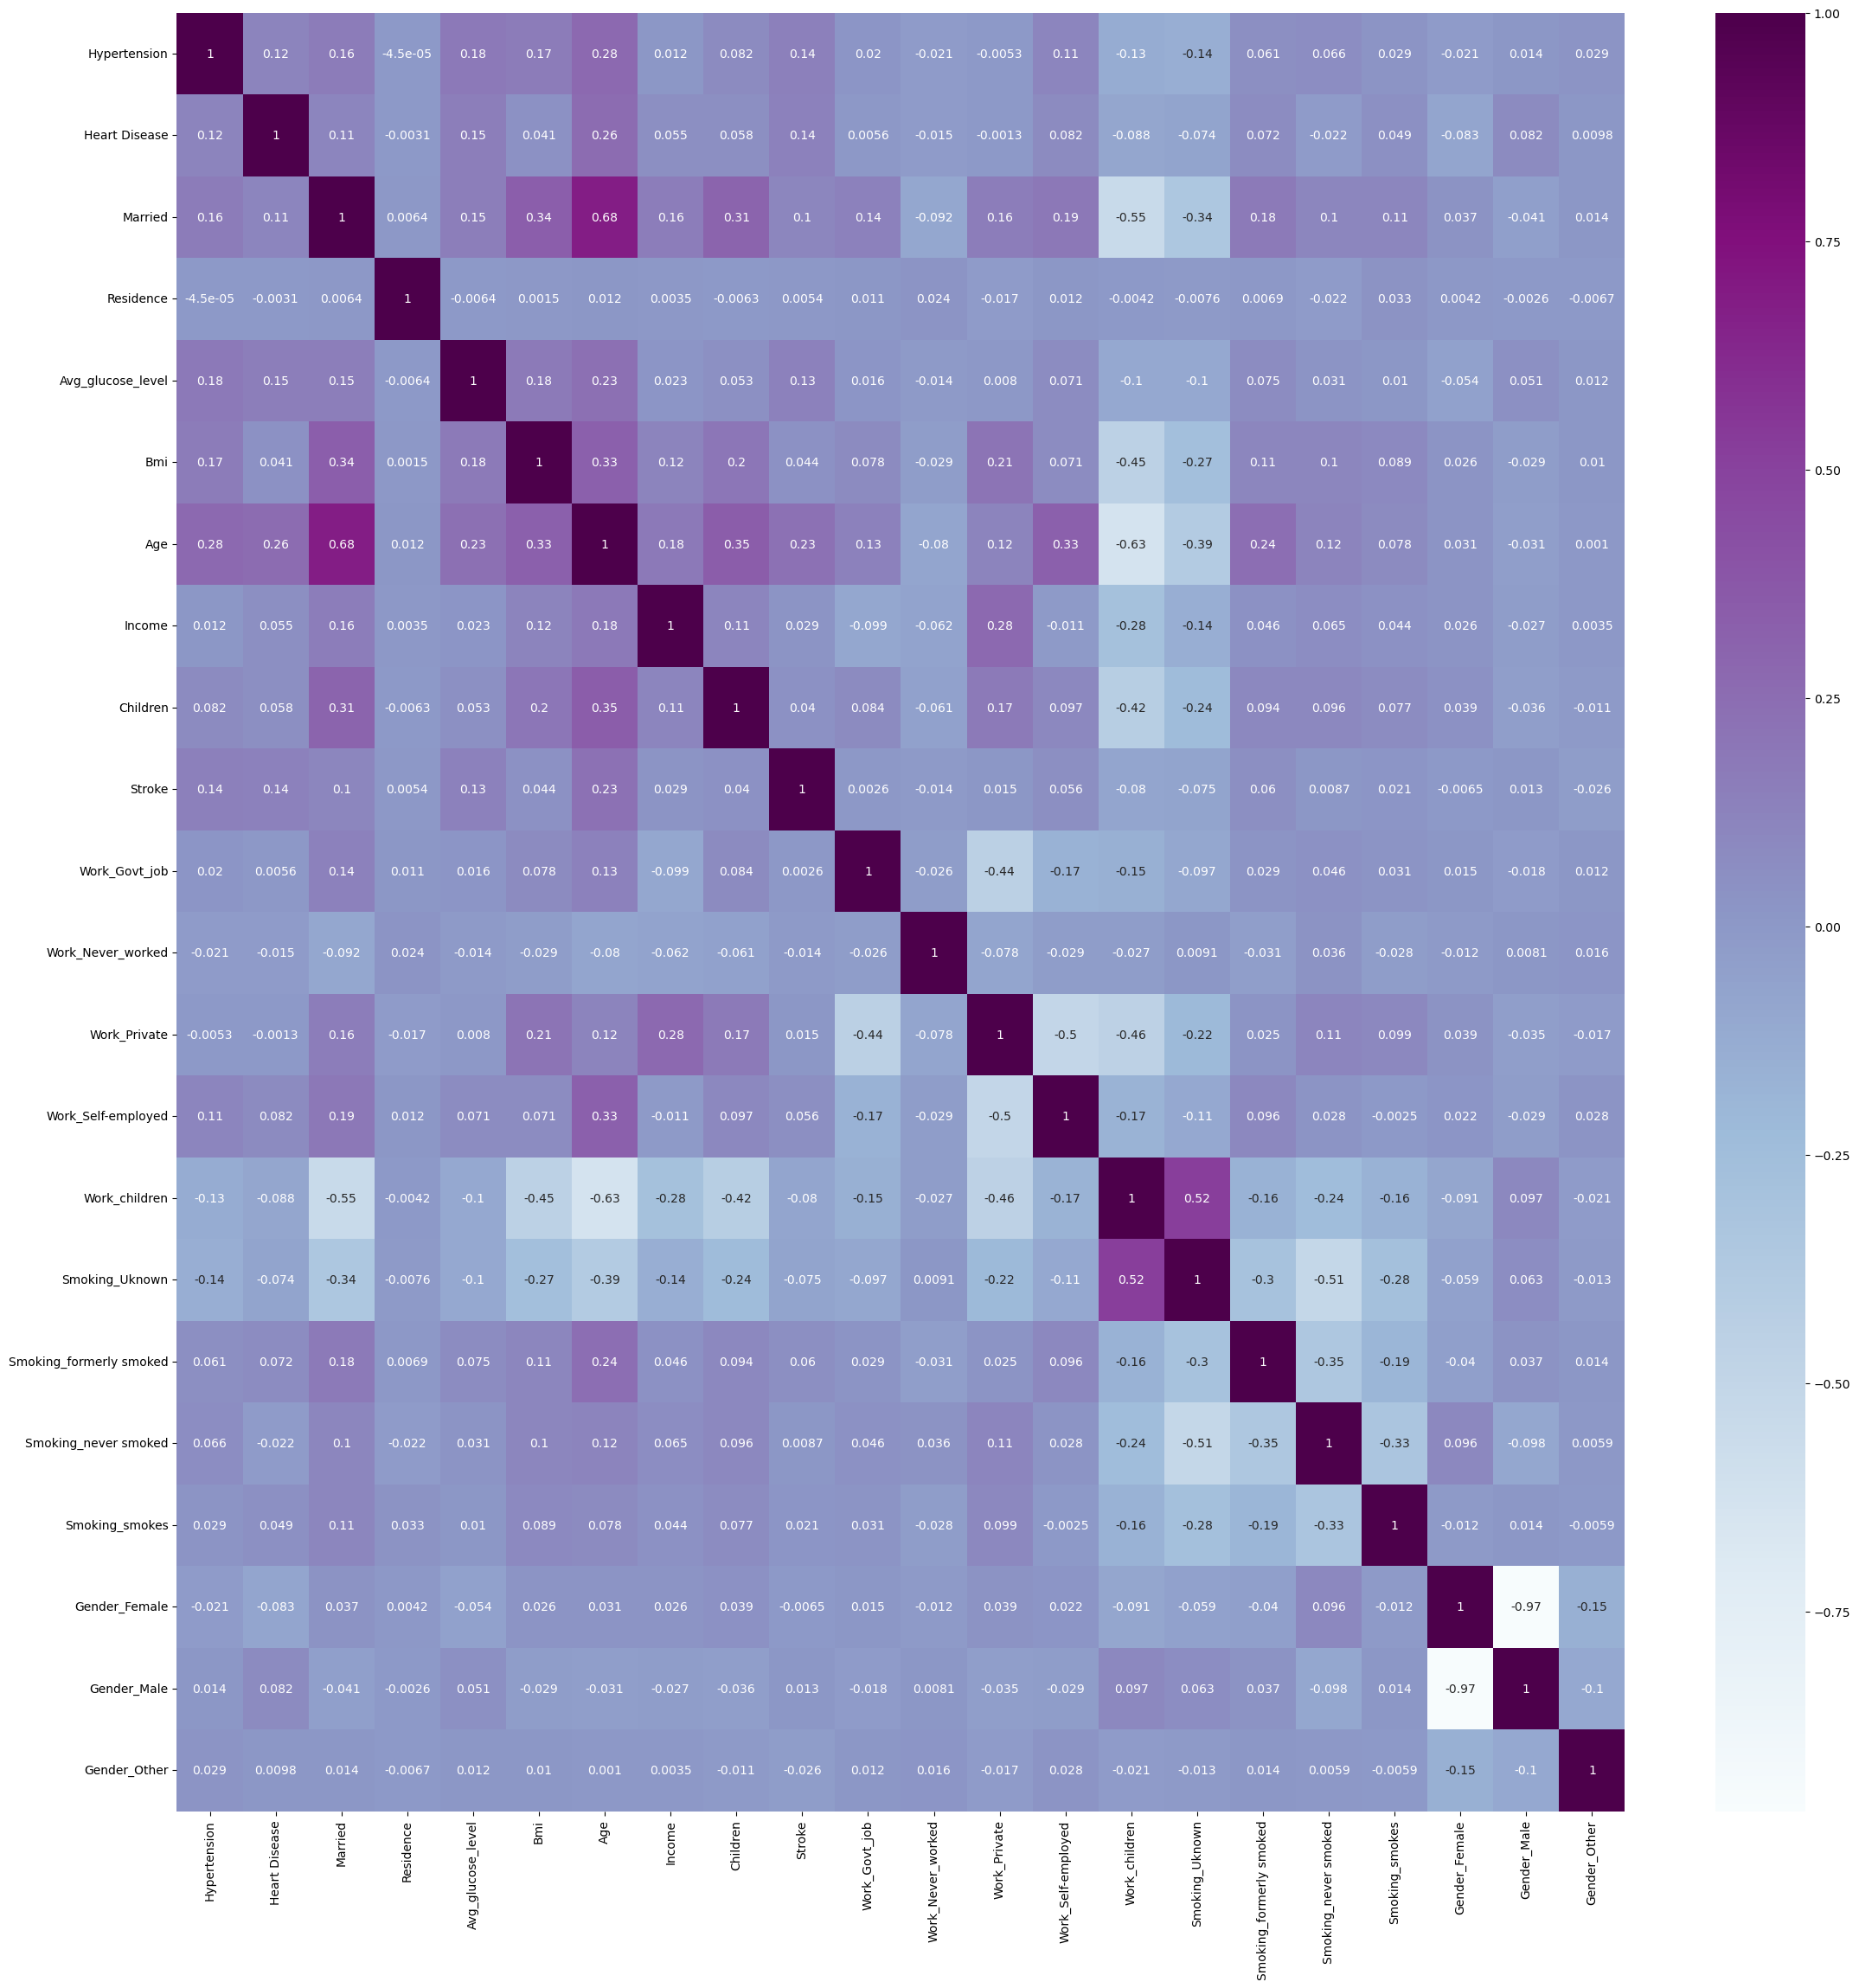

In [41]:
import seaborn as sns
matriz_correlacion = df_accl.corr()

# Muestra la correlación entre variables predictivas

plt.figure(figsize=(27,27))

#Se hace un mapa con la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap="BuPu")

<Axes: >

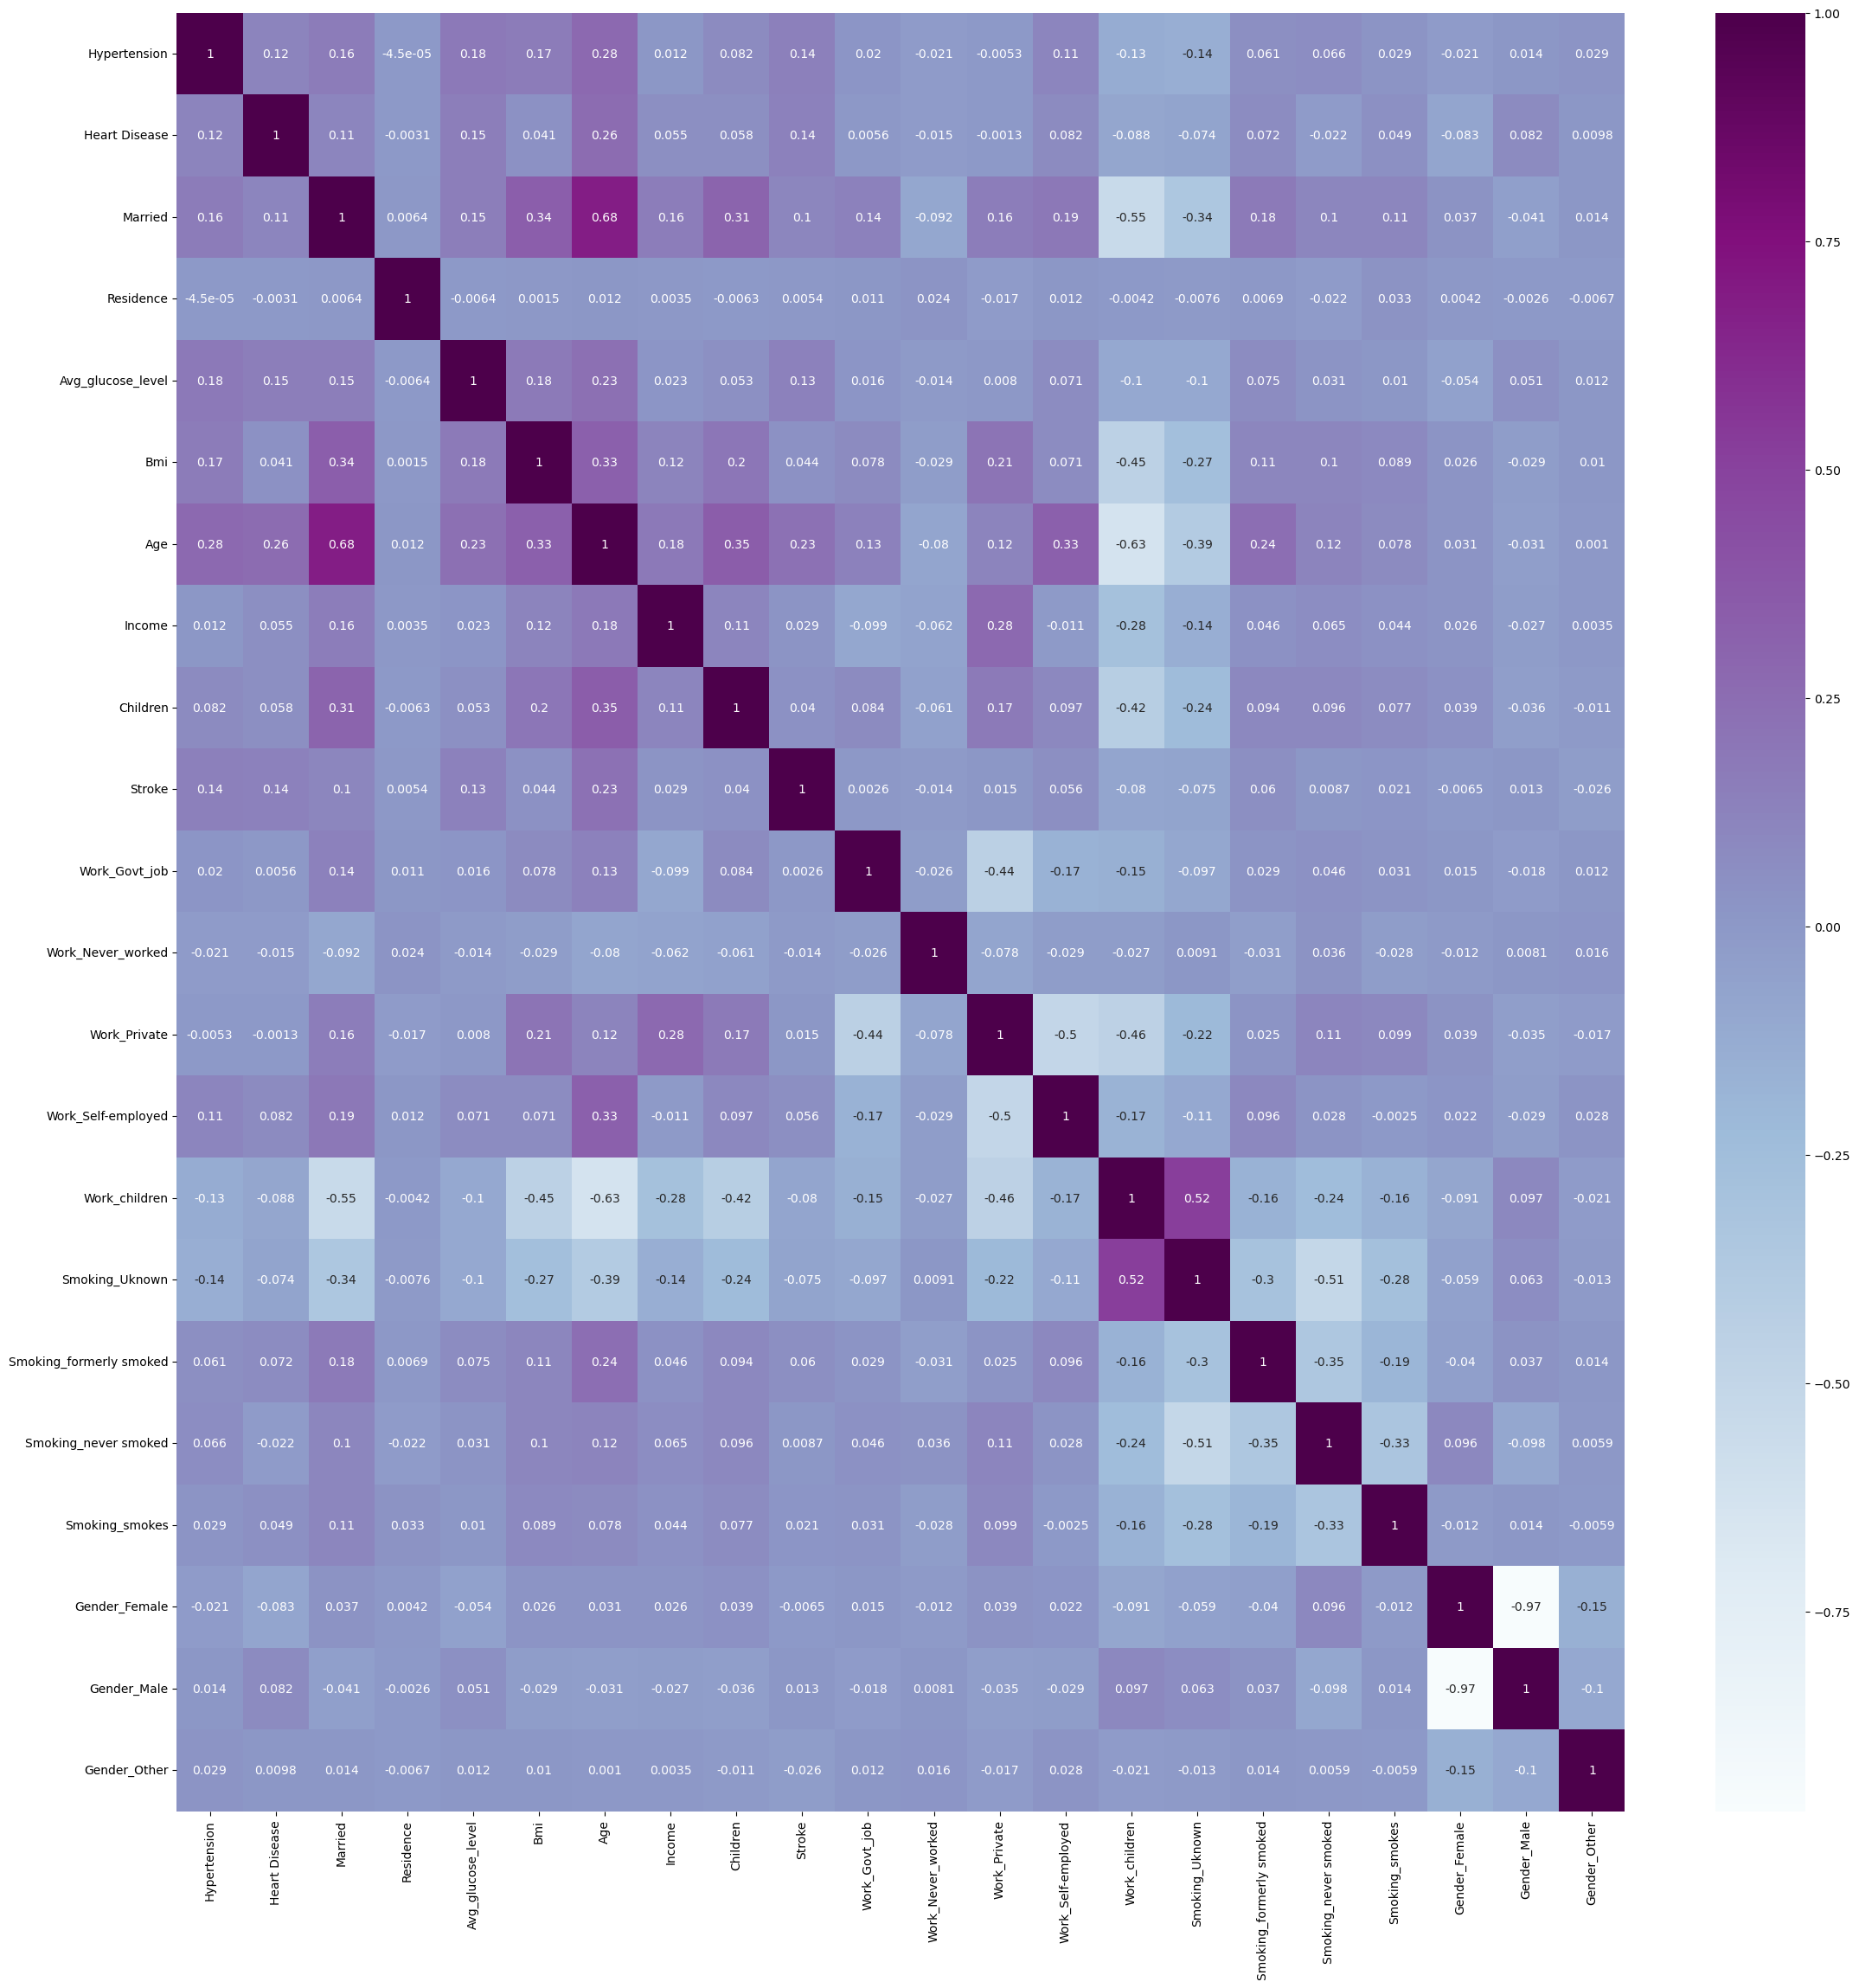

In [42]:
import seaborn as sns
matriz_correlacion = df_accl.corr()

# Muestra la correlación de las variables predictivas

plt.figure(figsize=(27,27))
#with the correlation matrix we can now see the results illustrated
sns.heatmap(matriz_correlacion, annot=True, cmap="BuPu")

### Visualización de Datos varibles predictivas

#### AGE

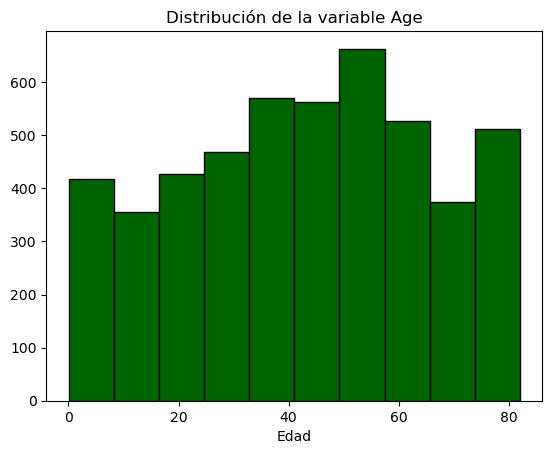

In [43]:
plt.hist(df_accl['Age'], color='darkgreen', edgecolor='black')
plt.xlabel('Edad')
plt.title('Distribución de la variable Age')
plt.show()

#### BMI

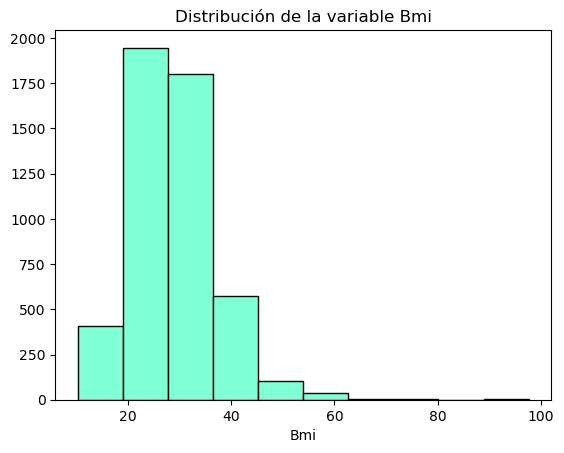

In [44]:
plt.hist(df_accl['Bmi'], color="aquamarine", edgecolor='black')
plt.xlabel('Bmi')
plt.title('Distribución de la variable Bmi')
plt.show()

#### AVG_GLUCOSE

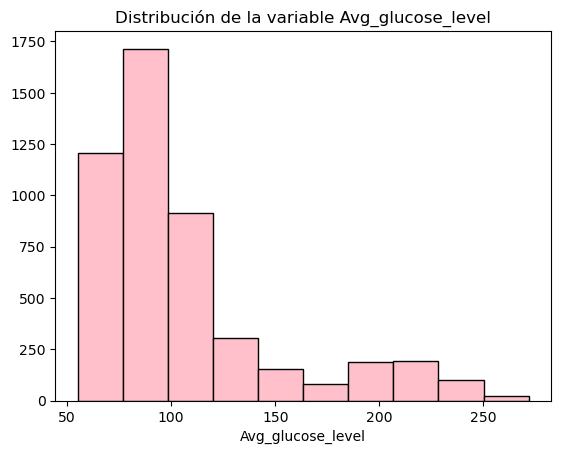

In [45]:
plt.hist(df_accl['Avg_glucose_level'], color="pink", edgecolor='black')
plt.xlabel('Avg_glucose_level')
plt.title('Distribución de la variable Avg_glucose_level')
plt.show()

#### INCOME

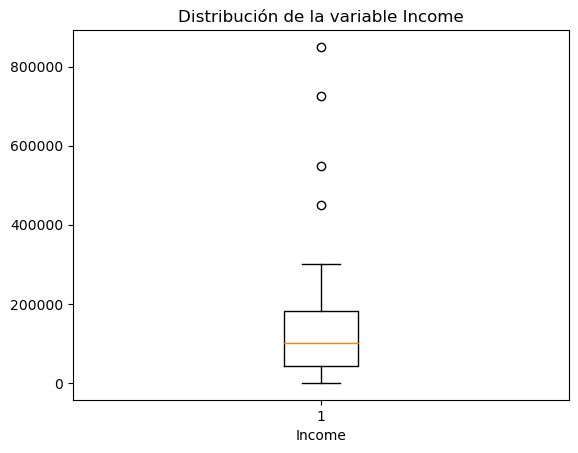

In [46]:
plt.boxplot(df_accl['Income'])
plt.xlabel('Income')
plt.title('Distribución de la variable Income')
plt.show()

#### CHILDREN

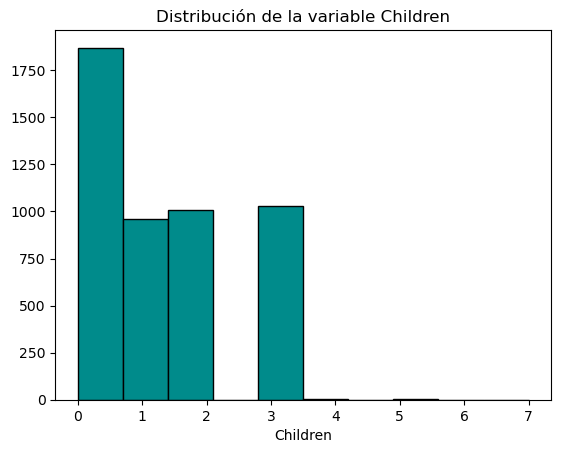

In [47]:
plt.hist(df_accl['Children'], color='darkcyan', edgecolor='black')
plt.xlabel('Children')
plt.title('Distribución de la variable Children')
plt.show()

#### HYPERTENSION

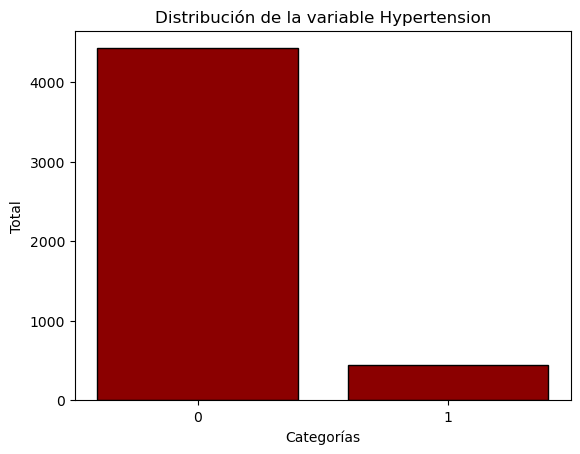

In [48]:
hipertension=df_accl.groupby('Hypertension').size()
plt.bar(['0','1'], hipertension, color='darkred', edgecolor='black')
plt.xlabel('Categorías')
plt.ylabel('Total')
plt.title('Distribución de la variable Hypertension')
plt.show()

#### HEART DISEASE

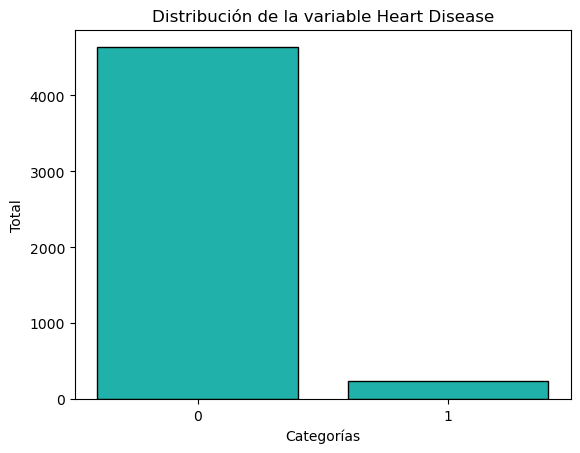

In [49]:
hd=df_accl.groupby('Heart Disease').size()
plt.bar(['0','1'], hd, color='lightseagreen', edgecolor='black')
plt.xlabel('Categorías')
plt.ylabel('Total')
plt.title('Distribución de la variable Heart Disease')
plt.show()

#### MARRIED

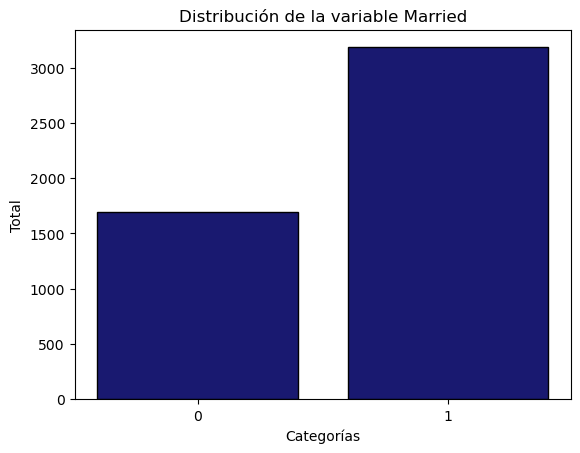

In [50]:
mr=df_accl.groupby('Married').size()
plt.bar(['0','1'],mr, color='midnightblue', edgecolor='black')
plt.xlabel('Categorías')
plt.ylabel('Total')
plt.title('Distribución de la variable Married')
plt.show()

#### RESIDENCE

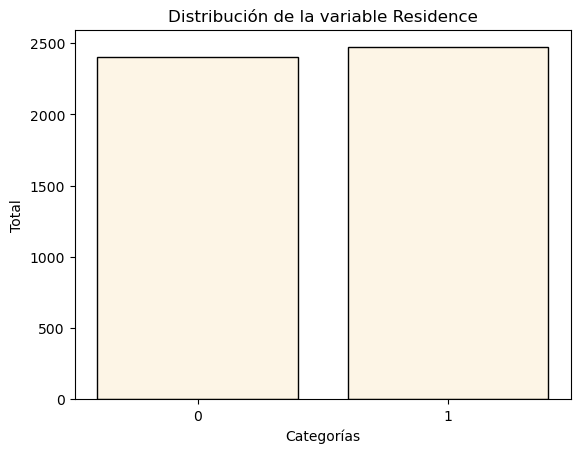

In [51]:
rd=df_accl.groupby('Residence').size()
plt.bar(['0','1'], rd, color='oldlace', edgecolor='black')
plt.xlabel('Categorías')
plt.ylabel('Total')
plt.title('Distribución de la variable Residence')
plt.show()

#### WORK

In [52]:
print(df_accl.groupby('Work_Govt_job').size())
print(df_accl.groupby('Work_Never_worked').size())
print(df_accl.groupby('Work_Private').size())
print(df_accl.groupby('Work_Self-employed').size())
print(df_accl.groupby('Work_children').size())

Work_Govt_job
False    4251
True      625
dtype: int64
Work_Never_worked
False    4854
True       22
dtype: int64
Work_Private
False    2082
True     2794
dtype: int64
Work_Self-employed
False    4107
True      769
dtype: int64
Work_children
False    4210
True      666
dtype: int64


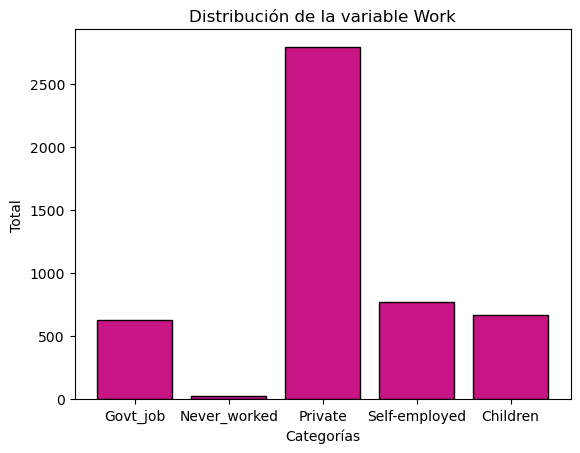

In [53]:
variables = ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'Children']
valores = [625, 22, 2794, 769, 666]
plt.bar(variables, valores, color='mediumvioletred', edgecolor='black')
plt.xlabel('Categorías')
plt.ylabel('Total')
plt.title('Distribución de la variable Work')
plt.show()

#### SMOKING

In [54]:
print(df_accl.groupby('Smoking_Uknown').size())
print(df_accl.groupby('Smoking_formerly smoked').size())
print(df_accl.groupby('Smoking_never smoked').size())
print(df_accl.groupby('Smoking_smokes').size())

Smoking_Uknown
False    3405
True     1471
dtype: int64
Smoking_formerly smoked
False    4042
True      834
dtype: int64
Smoking_never smoked
False    3038
True     1838
dtype: int64
Smoking_smokes
False    4143
True      733
dtype: int64


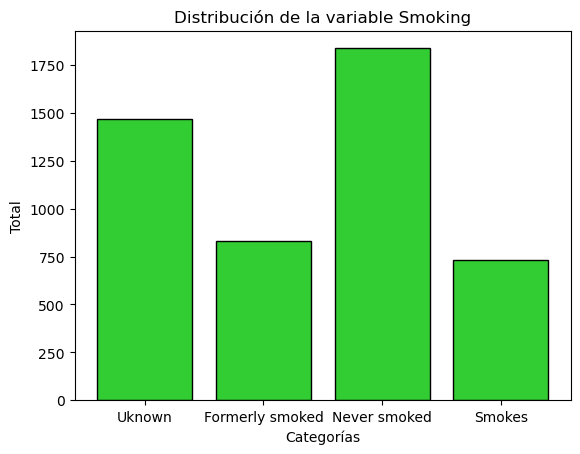

In [55]:
variabless = ['Uknown','Formerly smoked', 'Never smoked', 'Smokes']
valoress = [1471, 834, 1838, 733]
plt.bar(variabless, valoress, color='limegreen', edgecolor='black')
plt.xlabel('Categorías')
plt.ylabel('Total')
plt.title('Distribución de la variable Smoking')
plt.show()

#### GENDER

In [56]:
print(df_accl.groupby('Gender_Female').size())
print(df_accl.groupby('Gender_Male').size())
print(df_accl.groupby('Gender_Other').size())

Gender_Female
False    2005
True     2871
dtype: int64
Gender_Male
False    2946
True     1930
dtype: int64
Gender_Other
False    4801
True       75
dtype: int64


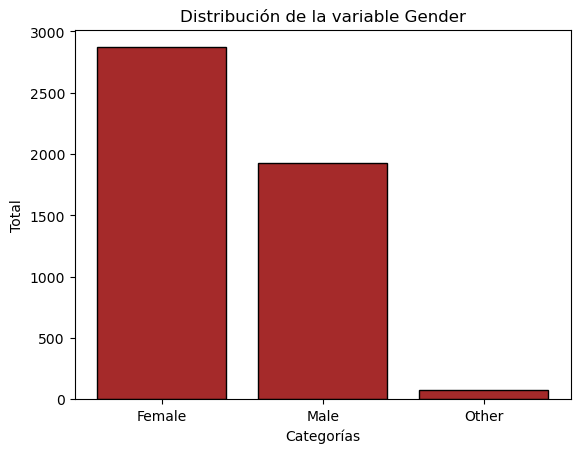

In [57]:
variablesg = ['Female','Male', 'Other']
valoresg = [2871, 1930, 75]
plt.bar(variablesg, valoresg, color='brown', edgecolor='black')
plt.xlabel('Categorías')
plt.ylabel('Total')
plt.title('Distribución de la variable Gender')
plt.show()

### Visualización de Datos varible respuesta

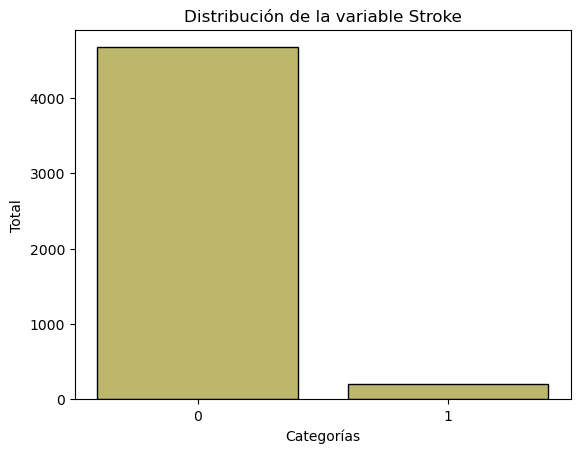

In [58]:
rd=df_accl.groupby('Stroke').size()
plt.bar(['0','1'], rd, color='darkkhaki', edgecolor='black')
plt.xlabel('Categorías')
plt.ylabel('Total')
plt.title('Distribución de la variable Stroke')
plt.show()

## BASE DE DATOS NO BALANCEADA

In [59]:
df_accl.keys()

Index(['Hypertension', 'Heart Disease', 'Married', 'Residence',
       'Avg_glucose_level', 'Bmi', 'Age', 'Income', 'Children', 'Stroke',
       'Work_Govt_job', 'Work_Never_worked', 'Work_Private',
       'Work_Self-employed', 'Work_children', 'Smoking_Uknown',
       'Smoking_formerly smoked', 'Smoking_never smoked', 'Smoking_smokes',
       'Gender_Female', 'Gender_Male', 'Gender_Other'],
      dtype='object')

In [60]:
X_accl=df_accl[['Hypertension', 'Heart Disease', 'Married', 'Residence',
       'Avg_glucose_level', 'Bmi', 'Age', 'Income', 'Children',
       'Work_Govt_job', 'Work_Never_worked', 'Work_Private',
       'Work_Self-employed', 'Work_children', 'Smoking_Uknown',
       'Smoking_formerly smoked', 'Smoking_never smoked', 'Smoking_smokes',
       'Gender_Female', 'Gender_Male', 'Gender_Other']]
y_accl=df_accl['Stroke']
train_accl, X_temp, train_acp, y_temp = train_test_split(X_accl, y_accl, test_size=0.4, random_state=1)

# Divide el conjunto temporal en conjuntos de validación y prueba
valid_accl, test_accl, valid_acp, test_acp = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

In [61]:
print(train_accl.shape)
print(valid_accl.shape)
print(test_accl.shape)
print(train_acp.shape)
print(valid_acp.shape)
print(test_acp.shape)

(2925, 21)
(975, 21)
(976, 21)
(2925,)
(975,)
(976,)


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
# Definir el clasificador
rfc = RandomForestClassifier()

# Definir los parámetros a buscar
param_grid_rfc = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [5, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [2, 4],
    'classifier__bootstrap': [True]
}

# Realizar undersampling
undersampler_rfc = RandomUnderSampler()
X_train_under_rfc, y_train_under_rfc = undersampler_rfc.fit_resample(train_accl, train_acp)

# Crear el pipeline para undersampling
pipeline_under = Pipeline([
    ('classifier', rfc)
])

# Realizar oversampling
oversampler = RandomOverSampler()
X_train_over_rfc, y_train_over_rfc = oversampler.fit_resample(train_accl, train_acp)

# Crear el pipeline para oversampling
pipeline_over = Pipeline([
    ('classifier', rfc)
])

# Realizar la búsqueda de hiperparámetros con undersampling
grid_search_under = GridSearchCV(pipeline_under, param_grid_rfc, cv=5, scoring='accuracy')
grid_search_under.fit(X_train_under_rfc, y_train_under_rfc)

# Obtener el mejor modelo con undersampling
best_model_under_rfc = grid_search_under.best_estimator_
best_hyperparams_under = grid_search_under.best_params_
print("Mejores hiperparámetros con undersampling:", best_hyperparams_under)

# Realizar la búsqueda de hiperparámetros con oversampling
grid_search_over = GridSearchCV(pipeline_over, param_grid_rfc, cv=5, scoring='accuracy')
grid_search_over.fit(X_train_over_rfc, y_train_over_rfc)

# Obtener el mejor modelo con oversampling
best_model_over_rfc = grid_search_over.best_estimator_
best_hyperparams_over = grid_search_over.best_params_
print("Mejores hiperparámetros con oversampling:", best_hyperparams_over)

# Predecir en el conjunto de prueba para undersampling
y_pred_under_rfc = best_model_under_rfc.predict(valid_accl)

# Calcular las métricas de evaluación para undersampling
accuracy_under_rfc = accuracy_score(valid_acp, y_pred_under_rfc)
precision_under_rfc = precision_score(valid_acp, y_pred_under_rfc)
recall_under_rfc = recall_score(valid_acp, y_pred_under_rfc)
f1_under_rfc = f1_score(valid_acp, y_pred_under_rfc)

# Predecir en el conjunto de prueba para oversampling
y_pred_over_rfc = best_model_over_rfc.predict(valid_accl)

# Calcular las métricas de evaluación para oversampling
accuracy_over_rfc = accuracy_score(valid_acp, y_pred_over_rfc)
precision_over_rfc = precision_score(valid_acp, y_pred_over_rfc)
recall_over_rfc = recall_score(valid_acp, y_pred_over_rfc)
f1_over_rfc = f1_score(valid_acp, y_pred_over_rfc)

# Imprimir las métricas de evaluación
print("\nResultados con undersampling:")
print("Accuracy:", accuracy_under_rfc)
print("Precision:", precision_under_rfc)
print("Recall:", recall_under_rfc)
print("F1-score:", f1_under_rfc)
print("\nResultados con oversampling:")
print("Accuracy:", accuracy_over_rfc)
print("Precision:", precision_over_rfc)
print("Recall:", recall_over_rfc)
print("F1-score:", f1_over_rfc)

Mejores hiperparámetros con undersampling: {'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Mejores hiperparámetros con oversampling: {'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}

Resultados con undersampling:
Accuracy: 0.6758974358974359
Precision: 0.09826589595375723
Recall: 0.8947368421052632
F1-score: 0.17708333333333334

Resultados con oversampling:
Accuracy: 0.9076923076923077
Precision: 0.11764705882352941
Recall: 0.21052631578947367
F1-score: 0.1509433962264151


In [63]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind([accuracy_under_rfc, precision_under_rfc, recall_under_rfc,f1_under_rfc],
                                 [accuracy_over_rfc, precision_over_rfc, recall_over_rfc,f1_over_rfc])
print("Valor p:", p_value)

Valor p: 0.6848271212211212


In [64]:
# Predecir en el conjunto de prueba con oversampling
y_pred_test_os = best_model_over_rfc.predict(test_accl)

# Calcular las métricas de evaluación en el conjunto de prueba con oversampling
accuracy_test_os = accuracy_score(test_acp, y_pred_test_os)
precision_test_os = precision_score(test_acp, y_pred_test_os)
recall_test_os = recall_score(test_acp, y_pred_test_os)
f1_test_os = f1_score(test_acp, y_pred_test_os)

# Imprimir las métricas de evaluación en el conjunto de prueba con oversampling
print("\nResultados en el conjunto de prueba oversampling:")
print("Accuracy:", accuracy_test_os)
print("Precision:", precision_test_os)
print("Recall:", recall_test_os)
print("F1-score:", f1_test_os)

# Predecir en el conjunto de prueba con undersampling
y_pred_test_us = best_model_under_rfc.predict(test_accl)

# Calcular las métricas de evaluación en el conjunto de prueba con undersampling
accuracy_test_us = accuracy_score(test_acp, y_pred_test_us)
precision_test_us = precision_score(test_acp, y_pred_test_us)
recall_test_us = recall_score(test_acp, y_pred_test_us)
f1_test_us = f1_score(test_acp, y_pred_test_us)

# Imprimir las métricas de evaluación en el conjunto de prueba con undersampling
print("\nResultados en el conjunto de prueba undersampling:")
print("Accuracy:", accuracy_test_us)
print("Precision:", precision_test_us)
print("Recall:", recall_test_us)
print("F1-score:", f1_test_us)


Resultados en el conjunto de prueba oversampling:
Accuracy: 0.9057377049180327
Precision: 0.20987654320987653
Recall: 0.37777777777777777
F1-score: 0.26984126984126977

Resultados en el conjunto de prueba undersampling:
Accuracy: 0.6711065573770492
Precision: 0.11016949152542373
Recall: 0.8666666666666667
F1-score: 0.19548872180451127


In [65]:
t_statistic, p_value = ttest_ind([accuracy_test_us, precision_test_us, recall_test_us,f1_test_us],
                                 [accuracy_test_os, precision_test_os, recall_test_os,f1_test_os])
print("Valor p:", p_value)

Valor p: 0.9367653780184457


Metrics Training:
Confusion matrix:
[[1898  906]
 [  85 2719]]
Accuracy: 0.8233
Precision: 0.7501
sensitivity: 0.9697
Specificity: 0.6769
AUC: 0.9176
F1 score: 0.8459


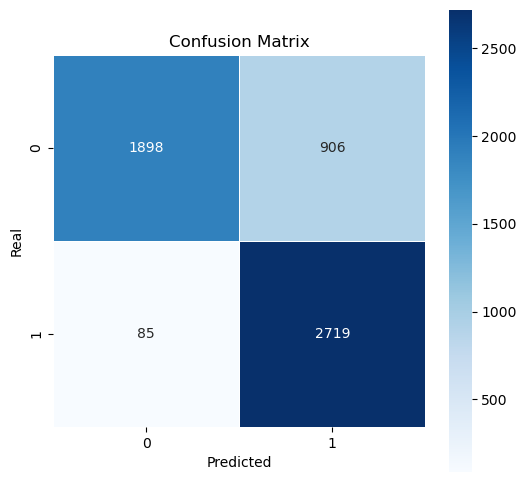

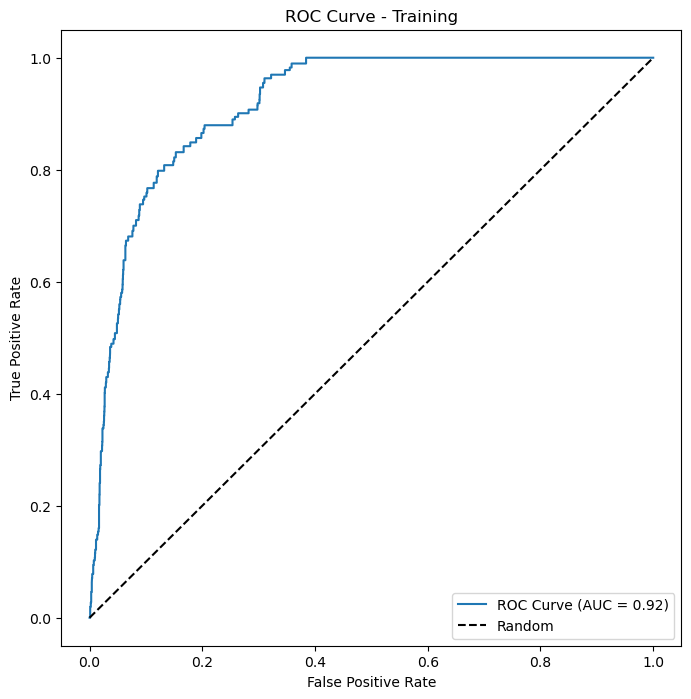

Metrics Validation:
Confusion matrix:
[[625 312]
 [  4  34]]
Accuracy: 0.6759
Precision: 0.0983
sensitivity: 0.8947
Specificity: 0.6670
AUC: 0.8449
F1 score: 0.1771


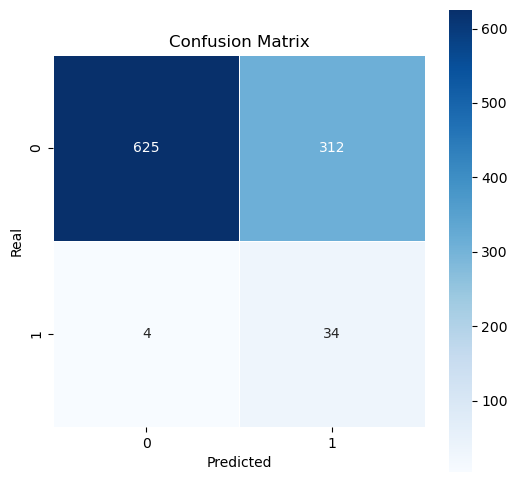

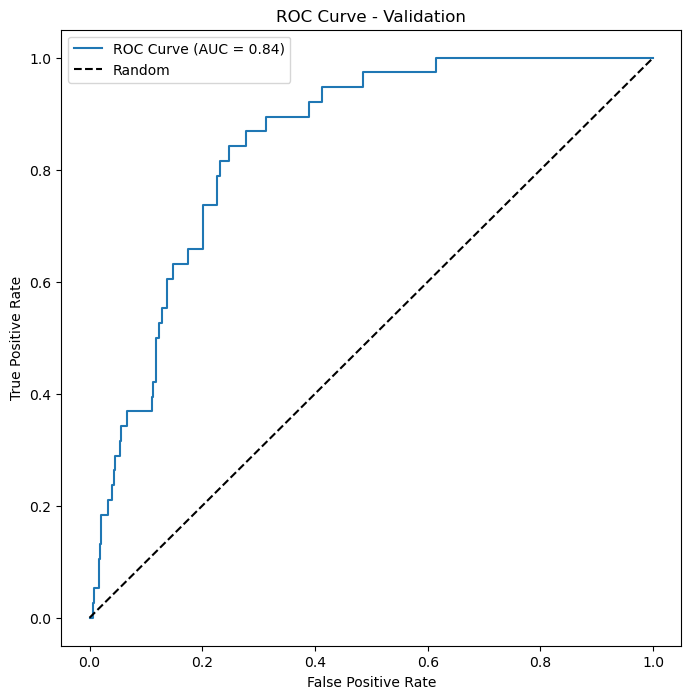

Metrics Test:
Confusion matrix:
[[616 315]
 [  6  39]]
Accuracy: 0.6711
Precision: 0.1102
sensitivity: 0.8667
Specificity: 0.6617
AUC: 0.8263
F1 score: 0.1955


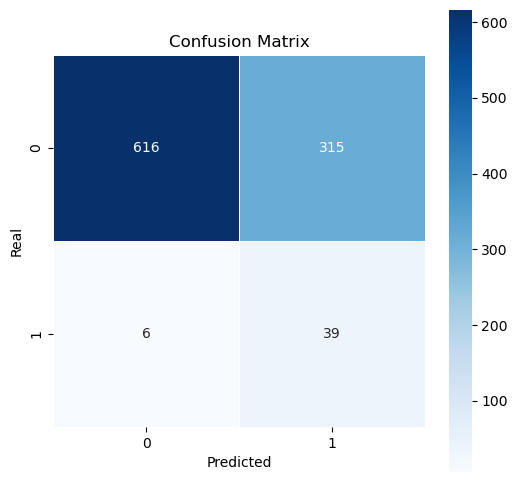

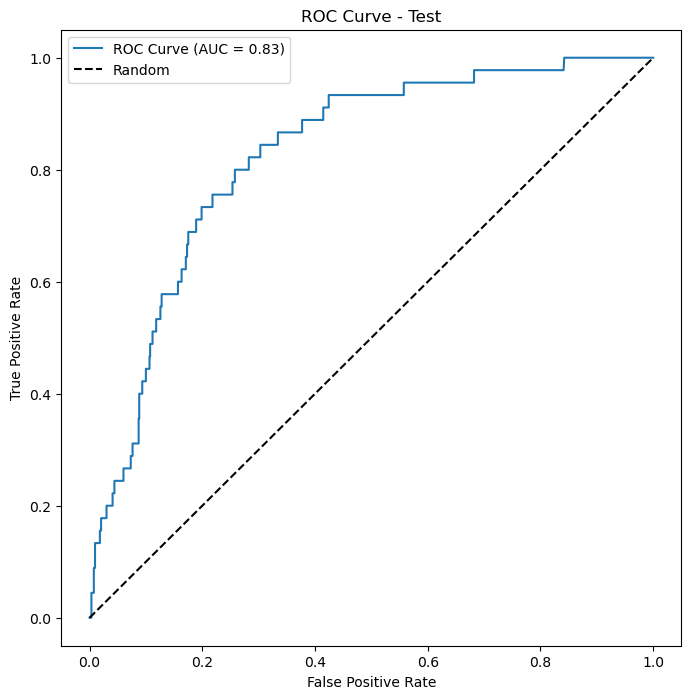

In [66]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
# Se define una función para evaluar el modelo e imprimir la matriz de confusión y las métricas de evaluación requeridas
def evaluar_modelo(modelo, X, y, conjunto):
    y_pred = modelo.predict(X)
    y_probs = modelo.predict_proba(X)[:, 1]
#Se calcula precision, accuracy, specificity, sensitivity, AUC and F1 score de las particiiones
    cm = confusion_matrix(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    sensitivity = recall_score(y, y_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    auc = roc_auc_score(y, y_probs)
    from sklearn.metrics import f1_score
    f1 = f1_score(y, y_pred)

    # Aquí se imprimen los valores de las métricas y la matriz de confusión
    print(f"Metrics {conjunto}:")
    print(f"Confusion matrix:\n{cm}")
    plt.figure(figsize=(6, 6))

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
    plt.xlabel('Predicted')
    plt.ylabel('Real')
    plt.title('Confusion Matrix')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"F1 score: {f1:.4f}")

    # Se grafica la curva ROC
    fpr, tpr, _ = roc_curve(y, y_probs)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {conjunto}')
    plt.legend()
    plt.show()

# Se evalua el modelo, usando la función definida, en cada partición
evaluar_modelo(best_model_under_rfc, X_train_over_rfc, y_train_over_rfc, 'Training')
evaluar_modelo(best_model_under_rfc, valid_accl, valid_acp, 'Validation')
evaluar_modelo(best_model_under_rfc, test_accl, test_acp, 'Test')

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el clasificador
clf = LogisticRegression()

# Definir los parámetros a buscar
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__max_iter': [200, 300, 400]
}

# Realizar undersampling
undersampler = RandomUnderSampler()
X_train_under, y_train_under = undersampler.fit_resample(train_accl, train_acp)

# Crear el pipeline para undersampling
pipeline_under = Pipeline([
    ('classifier', clf)
])

# Realizar oversampling
oversampler = RandomOverSampler()
X_train_over, y_train_over = oversampler.fit_resample(train_accl, train_acp)

# Crear el pipeline para oversampling
pipeline_over = Pipeline([
    ('classifier', clf)
])

# Realizar la búsqueda de hiperparámetros con undersampling
grid_search_under = GridSearchCV(pipeline_under, param_grid, cv=5, scoring='accuracy')
grid_search_under.fit(X_train_under, y_train_under)

# Obtener el mejor modelo con undersampling
best_model_under = grid_search_under.best_estimator_
best_hyperparams_under = grid_search_under.best_params_
print("Mejores hiperparámetros con undersampling:", best_hyperparams_under)

# Realizar la búsqueda de hiperparámetros con oversampling
grid_search_over = GridSearchCV(pipeline_over, param_grid, cv=5, scoring='accuracy')
grid_search_over.fit(X_train_over, y_train_over)

# Obtener el mejor modelo con oversampling
best_model_over = grid_search_over.best_estimator_
best_hyperparams_over = grid_search_over.best_params_
print("Mejores hiperparámetros con oversampling:", best_hyperparams_over)

# Predecir en el conjunto de prueba para undersampling
y_pred_under = best_model_under.predict(valid_accl)

# Calcular las métricas de evaluación para undersampling
accuracy_under = accuracy_score(valid_acp, y_pred_under)
precision_under = precision_score(valid_acp, y_pred_under)
recall_under = recall_score(valid_acp, y_pred_under)
f1_under = f1_score(valid_acp, y_pred_under)

# Predecir en el conjunto de prueba para oversampling
y_pred_over = best_model_over.predict(valid_accl)

# Calcular las métricas de evaluación para oversampling
accuracy_over = accuracy_score(valid_acp, y_pred_over)
precision_over = precision_score(valid_acp, y_pred_over)
recall_over = recall_score(valid_acp, y_pred_over)
f1_over = f1_score(valid_acp, y_pred_over)

# Imprimir las métricas de evaluación
print("\nResultados con undersampling:")
print("Accuracy:", accuracy_under)
print("Precision:", precision_under)
print("Recall:", recall_under)
print("F1-score:", f1_under)
print("\nResultados con oversampling:")
print("Accuracy:", accuracy_over)
print("Precision:", precision_over)
print("Recall:", recall_over)
print("F1-score:", f1_over)

Mejores hiperparámetros con undersampling: {'classifier__C': 0.1, 'classifier__max_iter': 200, 'classifier__penalty': 'l2'}
Mejores hiperparámetros con oversampling: {'classifier__C': 1, 'classifier__max_iter': 200, 'classifier__penalty': 'l2'}

Resultados con undersampling:
Accuracy: 0.6543589743589744
Precision: 0.08587257617728532
Recall: 0.8157894736842105
F1-score: 0.15538847117794485

Resultados con oversampling:
Accuracy: 0.6615384615384615
Precision: 0.08522727272727272
Recall: 0.7894736842105263
F1-score: 0.15384615384615385


In [68]:
t_statistic, p_value = ttest_ind([accuracy_over, precision_over, recall_over,f1_over],
                                 [accuracy_under, precision_under, recall_under,f1_under])
print("Valor p:", p_value)

Valor p: 0.9838996036318695


In [69]:
y_pred_under_test = best_model_under.predict(test_accl)

# Calcular las métricas de evaluación para undersampling
accuracy_under_test = accuracy_score(test_acp, y_pred_under_test)
precision_under_test = precision_score(test_acp, y_pred_under_test)
recall_under_test = recall_score(test_acp, y_pred_under_test)
f1_under_test = f1_score(test_acp, y_pred_under_test)

# Predecir en el conjunto de prueba para oversampling
y_pred_over_test = best_model_over.predict(test_accl)

# Calcular las métricas de evaluación para oversampling
accuracy_over_test = accuracy_score(test_acp, y_pred_over_test)
precision_over_test = precision_score(test_acp, y_pred_over_test)
recall_over_test = recall_score(test_acp, y_pred_over_test)
f1_over_test = f1_score(test_acp, y_pred_over_test)

# Imprimir las métricas de evaluación
print("Resultados con undersampling:")
print("Accuracy:", accuracy_under_test)
print("Precision:", precision_under_test)
print("Recall:", recall_under_test)
print("F1-score:", f1_under_test)
print("\nResultados con oversampling:")
print("Accuracy:", accuracy_over_test)
print("Precision:", precision_over_test)
print("Recall:", recall_over_test)
print("F1-score:", f1_over_test)

Resultados con undersampling:
Accuracy: 0.6413934426229508
Precision: 0.09973753280839895
Recall: 0.8444444444444444
F1-score: 0.1784037558685446

Resultados con oversampling:
Accuracy: 0.6485655737704918
Precision: 0.10160427807486631
Recall: 0.8444444444444444
F1-score: 0.18138424821002389


In [70]:
t_statistic, p_value = ttest_ind([accuracy_over_test, precision_over_test, recall_over_test,f1_over_test],
                                 [accuracy_under_test, precision_under_test, recall_under_test,f1_under_test])
print("Valor p:", p_value)

Valor p: 0.9909596237408325


Metrics Training:
Confusion matrix:
[[80 41]
 [31 90]]
Accuracy: 0.7025
Precision: 0.6870
sensitivity: 0.7438
Specificity: 0.6612
AUC: 0.8056
F1 score: 0.7143


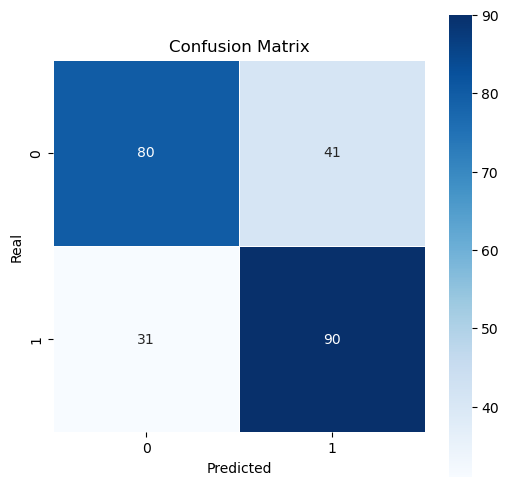

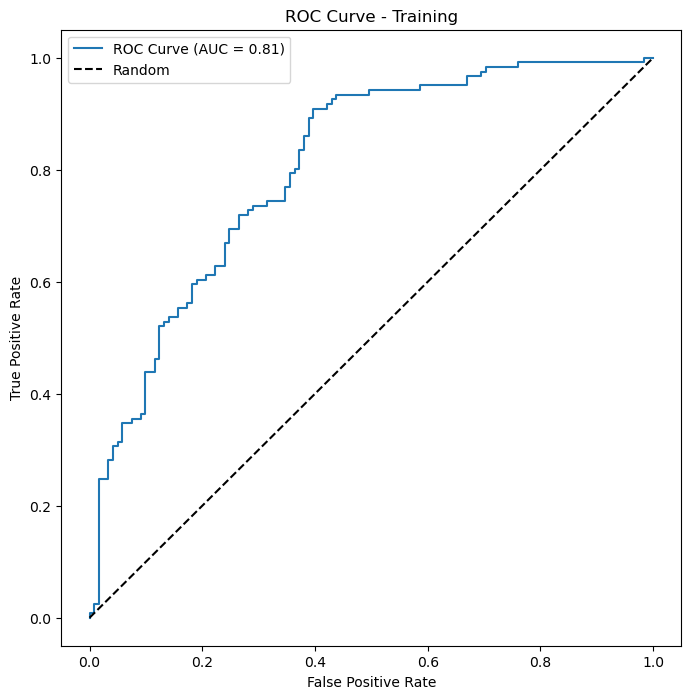

Metrics Validation:
Confusion matrix:
[[607 330]
 [  7  31]]
Accuracy: 0.6544
Precision: 0.0859
sensitivity: 0.8158
Specificity: 0.6478
AUC: 0.8352
F1 score: 0.1554


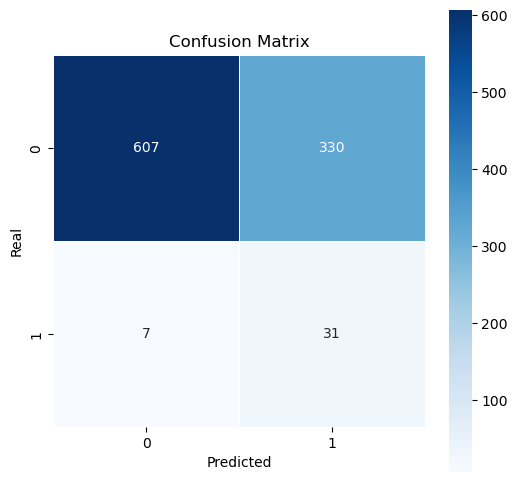

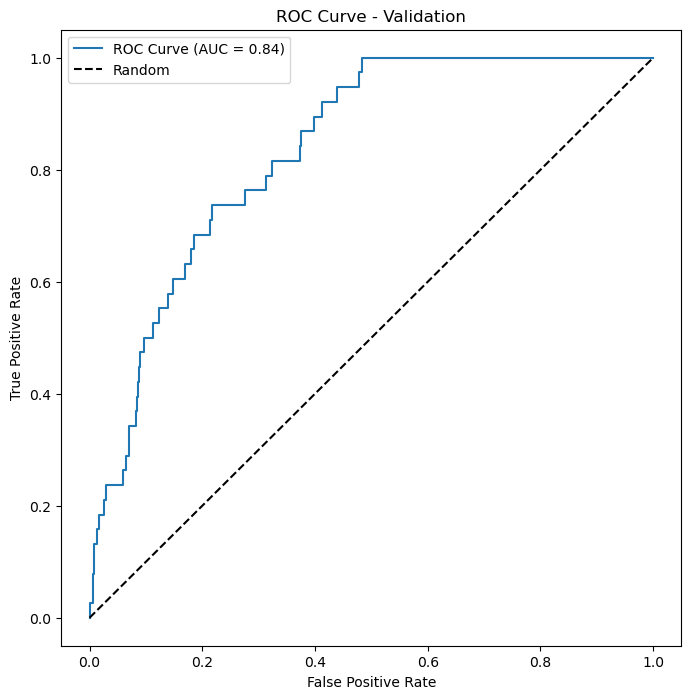

Metrics Test:
Confusion matrix:
[[588 343]
 [  7  38]]
Accuracy: 0.6414
Precision: 0.0997
sensitivity: 0.8444
Specificity: 0.6316
AUC: 0.7930
F1 score: 0.1784


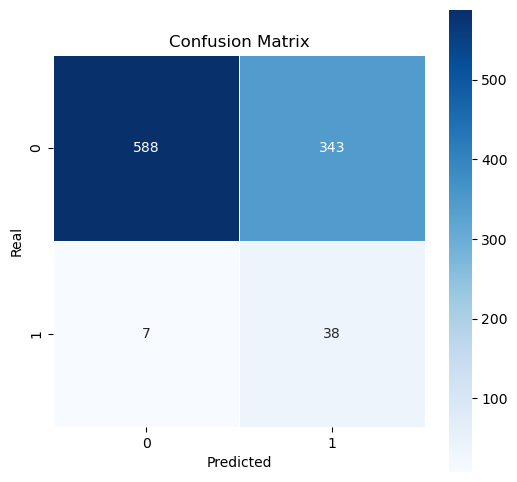

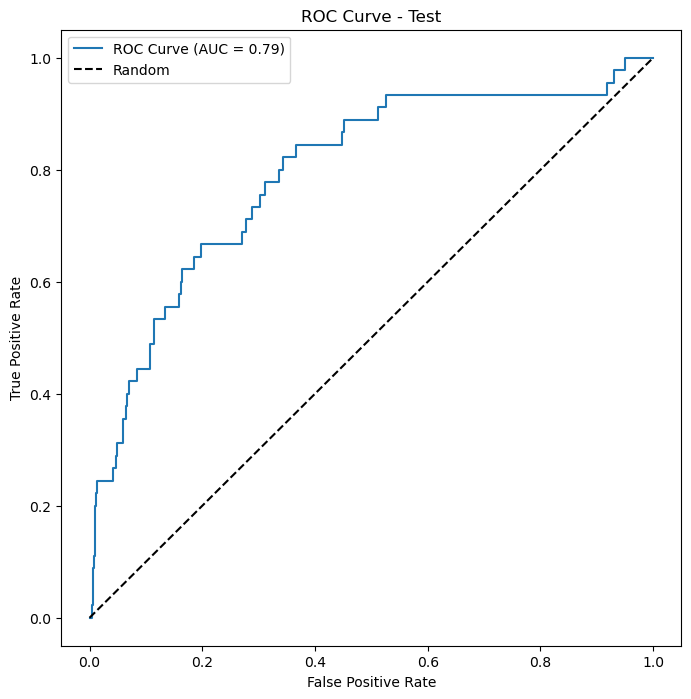

In [71]:
# Se evalua el modelo, usando la función definida, en cada partición
evaluar_modelo(best_model_under, X_train_under, y_train_under, 'Training')
evaluar_modelo(best_model_under, valid_accl, valid_acp, 'Validation')
evaluar_modelo(best_model_under, test_accl, test_acp, 'Test')

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import uniform

# Se mantiene la técnica del undersampling que se ha escogido en los modelos previos
undersampler = RandomUnderSampler()
X_train_under_nb, y_train_under_nb = undersampler.fit_resample(train_accl, train_acp)

# Se crea un modelo Naive Bayes Multinomial
nb_model = MultinomialNB()

# Se define el espacio de búsqueda del parámetro alpha
param_dist = {
    'alpha': uniform(0.1, 1.0)
}

# Se crea un objeto de búsqueda aleatoria para el mejor parámetro
random_search = RandomizedSearchCV(nb_model, param_distributions=param_dist, n_iter=25, cv=5, random_state=42)

# Se hace la búsqueda aleatoria con los datos del set de entrenamiento
random_search.fit(X_train_under_nb, y_train_under_nb)

# Se encuentra el mejor parámetro
best_params = random_search.best_params_

# Se crea el modelo final con el mejor parámetro y se ajusta a los datos de entrenamiento
final_model = MultinomialNB(**best_params)
final_model.fit(X_train_under_nb, y_train_under_nb)

MultinomialNB(alpha=0.2560186404424365)

Metrics Training:
Confusion matrix:
[[64 57]
 [50 71]]
Accuracy: 0.5579
Precision: 0.5547
sensitivity: 0.5868
Specificity: 0.5289
AUC: 0.6284
F1 score: 0.5703


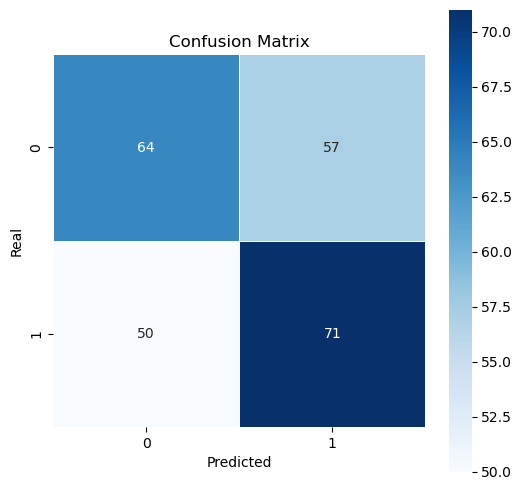

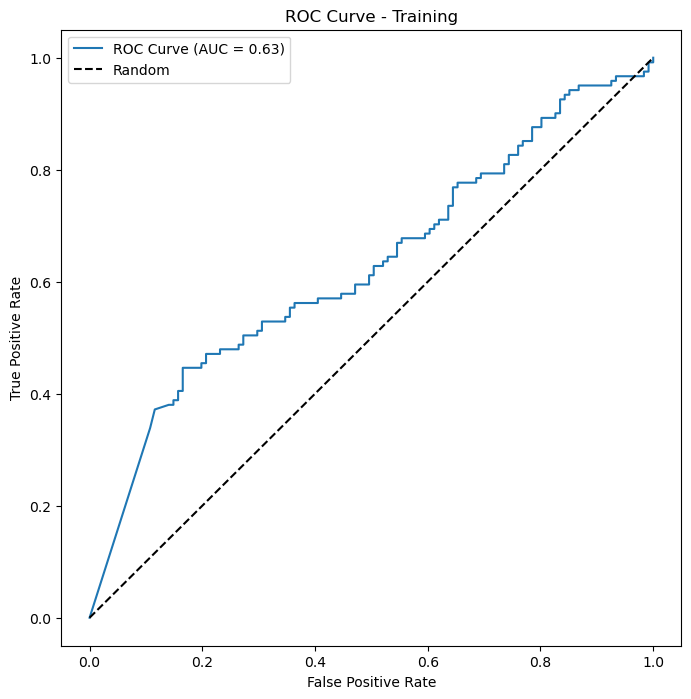

Metrics Validation:
Confusion matrix:
[[469 468]
 [ 17  21]]
Accuracy: 0.5026
Precision: 0.0429
sensitivity: 0.5526
Specificity: 0.5005
AUC: 0.5918
F1 score: 0.0797


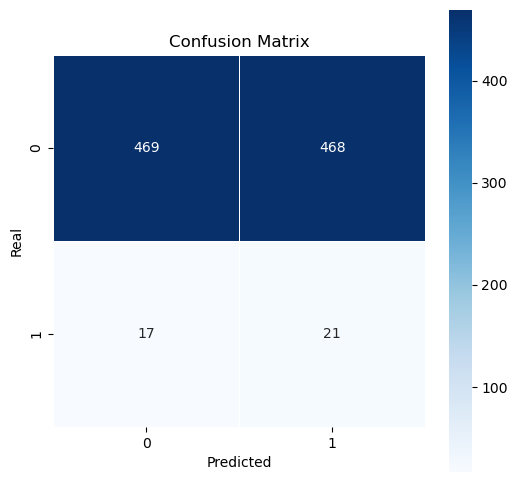

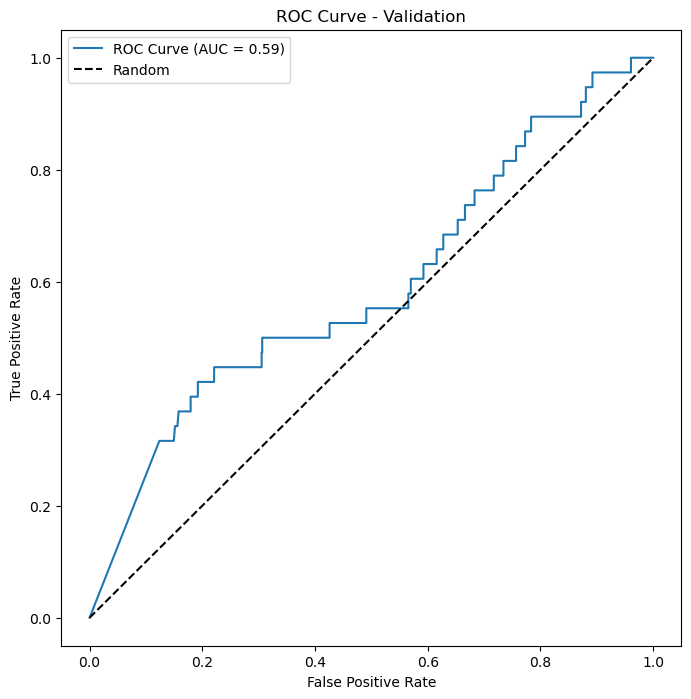

Metrics Test:
Confusion matrix:
[[425 506]
 [ 13  32]]
Accuracy: 0.4682
Precision: 0.0595
sensitivity: 0.7111
Specificity: 0.4565
AUC: 0.6639
F1 score: 0.1098


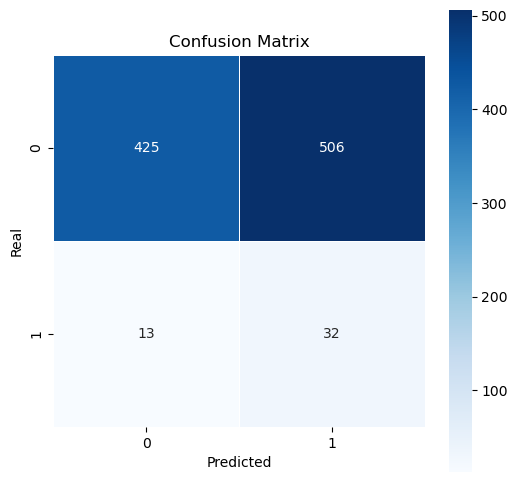

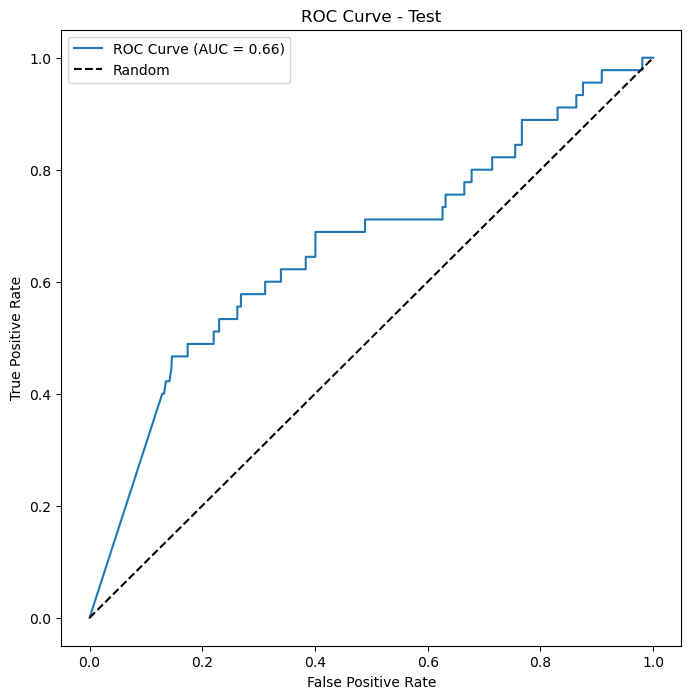

In [73]:
# Se evalua el modelo, usando la función definida, en cada partición
evaluar_modelo(final_model, X_train_under_nb, y_train_under_nb, 'Training')
evaluar_modelo(final_model, valid_accl, valid_acp, 'Validation')
evaluar_modelo(final_model, test_accl, test_acp, 'Test')

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler


# Inicializar el clasificador de Gradient Boosting
gbc = GradientBoostingClassifier()

# Definir los parámetros a buscar
param_grid_gbc = {
    'classifier__n_estimators': [50, 100],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Realizar undersampling
undersampler_gbc = RandomUnderSampler()
X_train_under_gbc, y_train_under_gbc = undersampler_gbc.fit_resample(train_accl, train_acp)

# Crear el pipeline para el clasificador
pipeline_under = Pipeline([
    ('classifier', gbc)
])

# Realizar la búsqueda de hiperparámetros con undersampling
grid_search_under = GridSearchCV(pipeline_under, param_grid_gbc, cv=5, scoring='accuracy')
grid_search_under.fit(X_train_under_gbc, y_train_under_gbc)

# Obtener el mejor modelo con undersampling
best_model_under_gbc = grid_search_under.best_estimator_
best_hyperparams_under = grid_search_under.best_params_
print("Mejores hiperparámetros con undersampling:", best_hyperparams_under)


Mejores hiperparámetros con undersampling: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


Metrics Training:
Confusion matrix:
[[ 95  26]
 [ 13 108]]
Accuracy: 0.8388
Precision: 0.8060
sensitivity: 0.8926
Specificity: 0.7851
AUC: 0.9417
F1 score: 0.8471


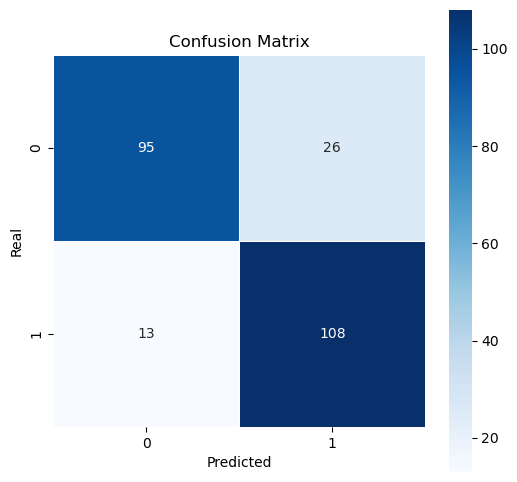

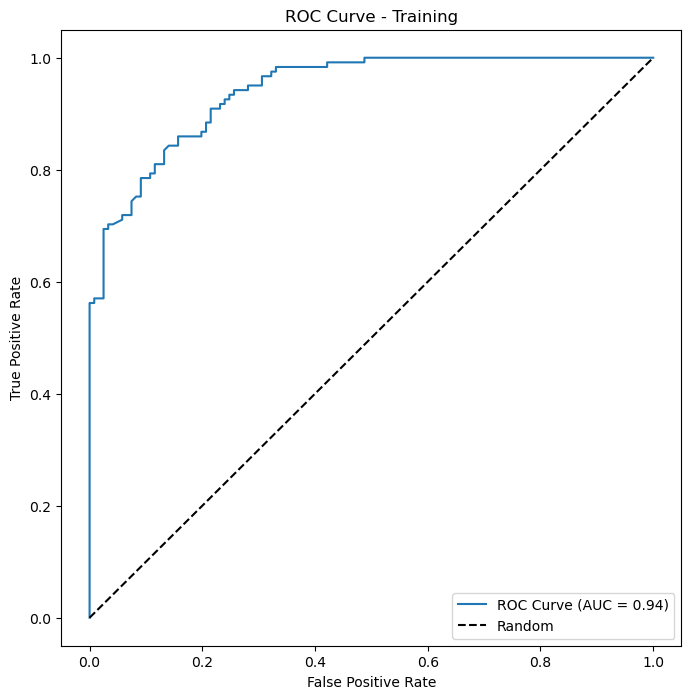

Metrics Validation:
Confusion matrix:
[[676 261]
 [  8  30]]
Accuracy: 0.7241
Precision: 0.1031
sensitivity: 0.7895
Specificity: 0.7215
AUC: 0.8161
F1 score: 0.1824


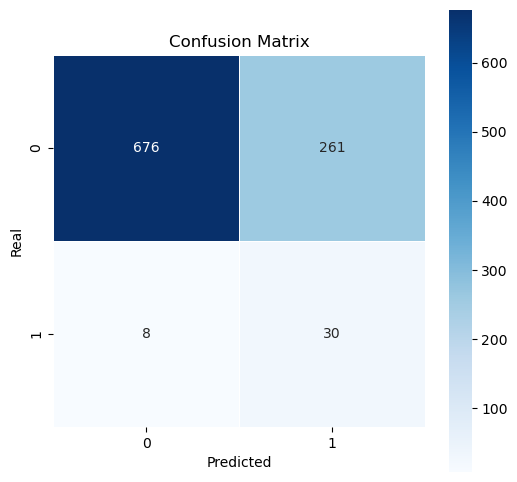

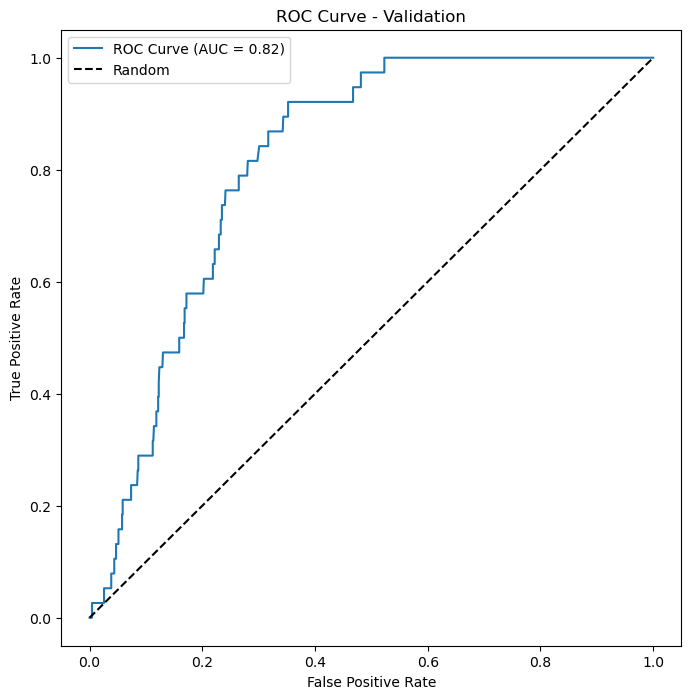

Metrics Test:
Confusion matrix:
[[648 283]
 [  7  38]]
Accuracy: 0.7029
Precision: 0.1184
sensitivity: 0.8444
Specificity: 0.6960
AUC: 0.8181
F1 score: 0.2077


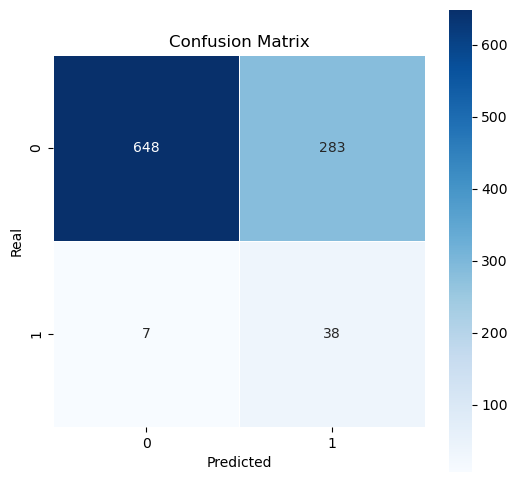

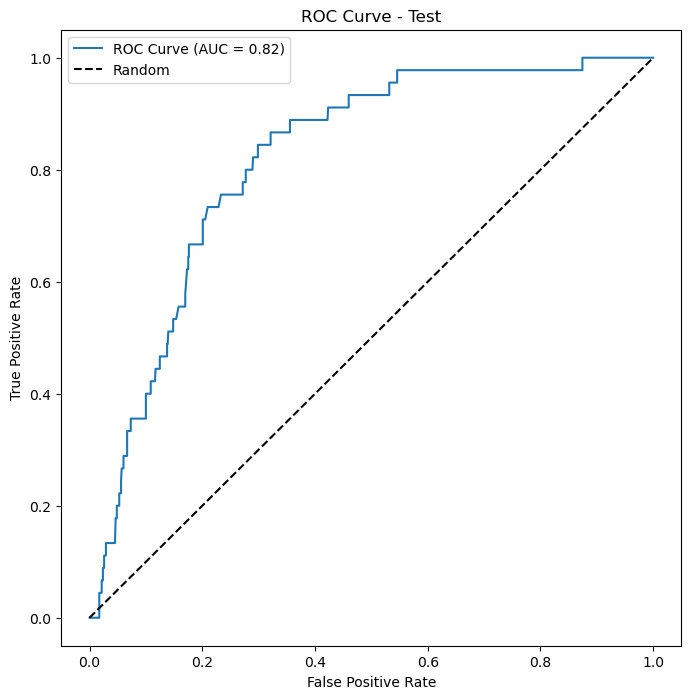

In [75]:
# Se evalua el modelo, usando la función definida, en cada partición
evaluar_modelo(best_model_under_gbc, X_train_under_gbc, y_train_under_gbc, 'Training')
evaluar_modelo(best_model_under_gbc, valid_accl, valid_acp, 'Validation')
evaluar_modelo(best_model_under_gbc, test_accl, test_acp, 'Test')

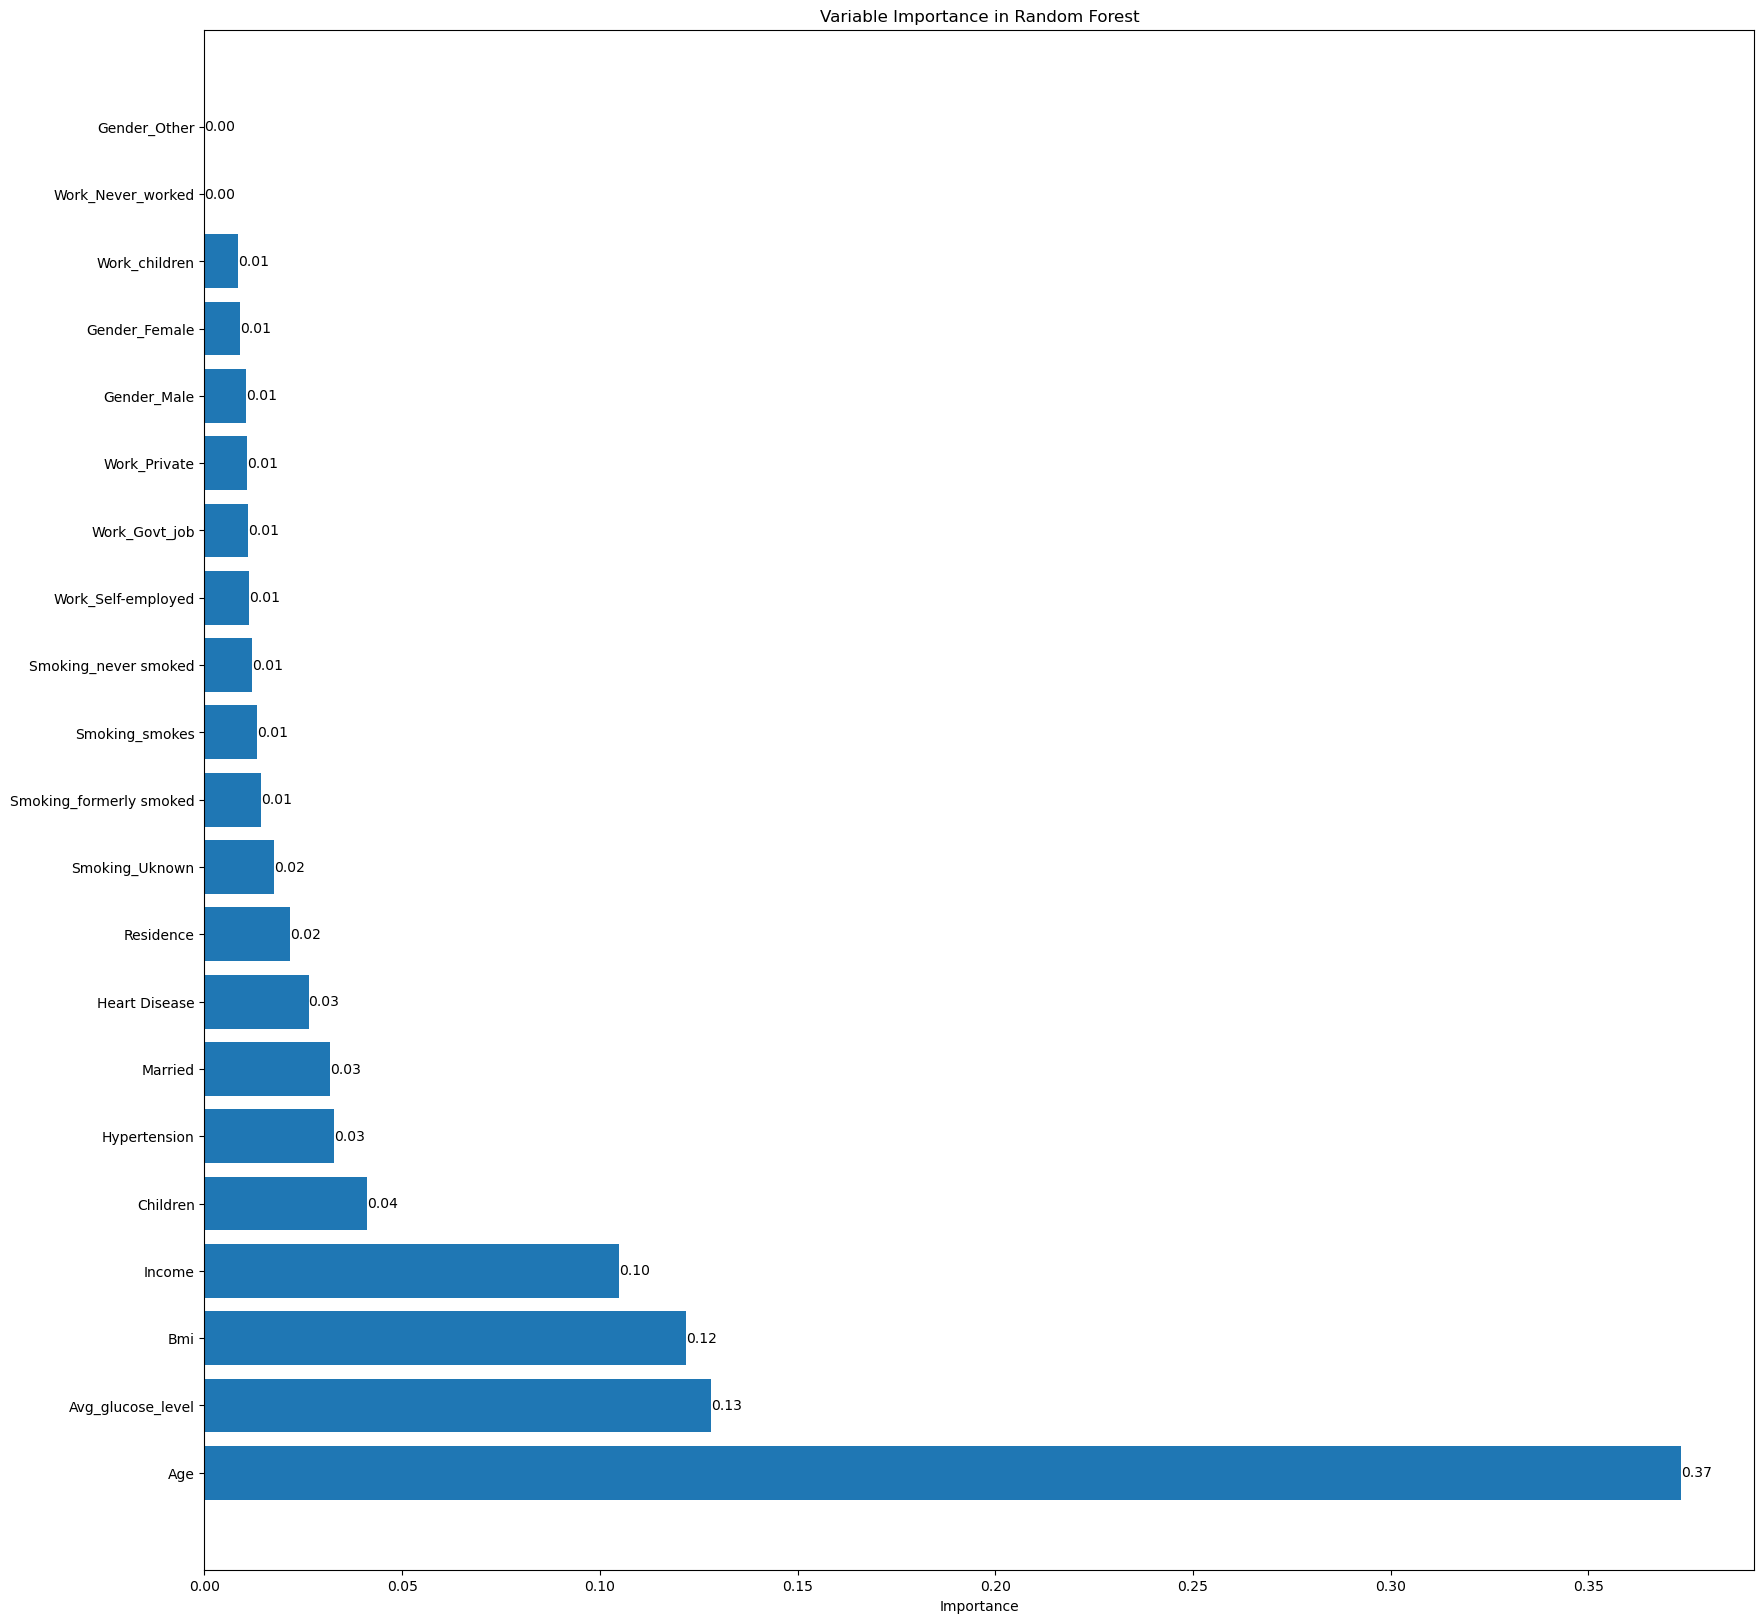

In [76]:
# Se calcula la importancia de las variables predictivas
estimator = best_model_under_rfc.named_steps['classifier']
feature_importances = estimator.feature_importances_

# Creamos un dataframe con los nombres de las variables predictivas y los valores de su importancia
feature_importance_df = pd.DataFrame({
    'Variable': X_train_under_rfc.columns,  # Make sure this is a list of feature names
    'Importance': feature_importances
})

# Se ordena el dataframe por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Se muestran las variables y sus importancias en un modelo de random forest
plt.figure(figsize=(20,20))
bars = plt.barh(feature_importance_df['Variable'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Variable Importance in Random Forest')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', 
             va='center', ha='left')

plt.show()


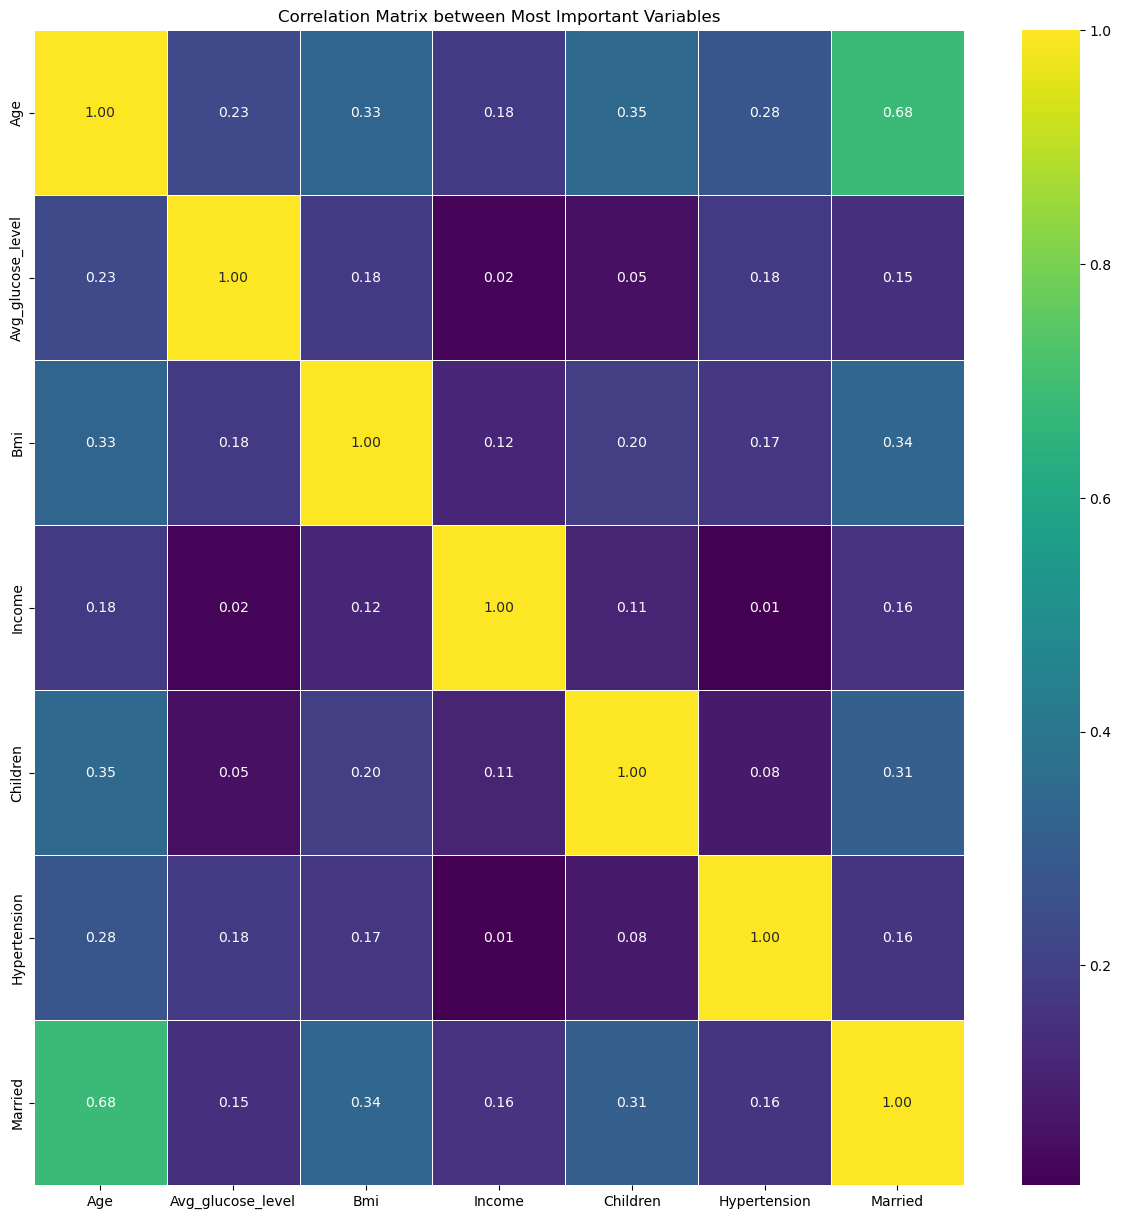

In [77]:
# Se definen las variables más importantes
top_variables = feature_importance_df.sort_values(by='Importance', ascending=False).head(7)['Variable']

# Se crea una columna en el dataframe solo con las variables más importantes
X_top = X_accl[top_variables]

# Se calcula la matriz de correlación entre las variables más importantes
correlation_matrix = X_top.corr()

# Se utiliza un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Most Important Variables')
plt.show()

### Referencias

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html

https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case 